# Classifying the level of damage from accident data.

## Data Overview

## Dataset Description

## Files

* **Praktikum_2_ML(train).csv** - Dataset untuk train / dilatih
* **Praktikum_2_ML(test).csv** - Dataset untuk test / menghasilkan submisi
* **Praktikum_2_ML(contoh).csv** - Contoh format pengumpulan

## Columns

* `crash_record_id` - ID unik yang mengidentifikasi setiap catatan kecelakaan.
* `tanggal_kecelakaan` - Tanggal terjadinya kecelakaan.
* `longitude` - Koordinat garis bujur lokasi kecelakaan.
* `latitude` - Koordinat garis lintang lokasi kecelakaan.
* `batas_kecepatan_terpasang` - Batas kecepatan yang terpasang di lokasi kecelakaan.
* `kondisi_perangkat` - Status perangkat yang terlibat dalam kecelakaan (misalnya, berfungsi/tidak berfungsi).
* `kondisi_cuaca` - Kondisi cuaca saat kecelakaan terjadi (misalnya, cerah, hujan, berkabut).
* `kondisi_pencahayaan` - Kondisi pencahayaan pada saat kecelakaan (misalnya, terang, gelap, senja).
* `jenis_jalan` - Jenis jalan di mana kecelakaan terjadi.
* `kondisi_permukaan_jalan` - Deskripsi kondisi permukaan jalan (misalnya, kering, basah, berlubang).
* `cacat_jalan` - Keberadaan cacat atau kerusakan pada jalan.
* `jenis_laporan` - Tipe laporan kecelakaan.
* `jenis_tabrakan_pertama` - Tipe tabrakan yang pertama terjadi (misalnya, tabrakan depan, samping).
* `jenis_kecelakaan` - Kategori umum kecelakaan.
* `jumlah_unit` - Jumlah kendaraan yang terlibat dalam kecelakaan.
* `penyebab_kecelakaan_utama` - Penyebab utama yang diidentifikasi untuk kecelakaan.
* `penyebab_kecelakaan_lain` - Penyebab lain yang mungkin berkontribusi pada kecelakaan.
* `cedera_terparah` - Jenis cedera terparah yang dialami.
* `jumlah_cedera` - Total jumlah cedera yang dilaporkan.
* `cedera_fatal` - Jumlah cedera yang berujung pada kematian.
* `cedera_serius` - Jumlah cedera serius yang dilaporkan.
* `cedera_tidak_serius` - Jumlah cedera yang tidak serius.
* `cedera_dilaporkan_tidak_nyata` - Jumlah cedera yang dilaporkan tetapi tidak dapat diidentifikasi.
* `tidak_ada_indikasi_cedera` - Jumlah kasus di mana tidak ada indikasi cedera.
* `kerusakan` - Deskripsi mengenai kerusakan yang terjadi pada kendaraan atau properti.


## Importing Libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Reading Datasets

In [194]:
df = pd.read_csv('Praktikum_2_ML(train).csv')

In [195]:
df.head().T

,0,1,2,3,4
crash_record_id,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...
tanggal_kecelakaan,06/01/2018 04:35:00 PM,02/06/2019 03:30:00 PM,06/17/2017 10:05:00 PM,08/09/2023 12:20:00 PM,09/17/2023 04:19:00 PM
longitude,-87.723019,-87.678016,-87.702085,-87.659829,-87.774777
latitude,41.785826,41.924513,41.946539,41.696878,41.971278
batas_kecepatan_terpasang,30,30,30,35,20
kondisi_perangkat,NO CONTROLS,NO CONTROLS,UNKNOWN,NO CONTROLS,NO CONTROLS
kondisi_cuaca,CLEAR,CLEAR,UNKNOWN,CLEAR,CLEAR
kondisi_pencahayaan,DAYLIGHT,DARKNESS,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT
jenis_jalan,NOT DIVIDED,NOT DIVIDED,PARKING LOT,NOT DIVIDED,ONE-WAY
kondisi_permukaan_jalan,DRY,DRY,UNKNOWN,DRY,DRY


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                11250 non-null  object 
 1   tanggal_kecelakaan             11250 non-null  object 
 2   longitude                      11250 non-null  float64
 3   latitude                       11250 non-null  float64
 4   batas_kecepatan_terpasang      11250 non-null  int64  
 5   kondisi_perangkat              11250 non-null  object 
 6   kondisi_cuaca                  11250 non-null  object 
 7   kondisi_pencahayaan            11250 non-null  object 
 8   jenis_jalan                    11250 non-null  object 
 9   kondisi_permukaan_jalan        11250 non-null  object 
 10  cacat_jalan                    11250 non-null  object 
 11  jenis_laporan                  11250 non-null  object 
 12  jenis_tabrakan_pertama         11250 non-null 

In [197]:
df.tail()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,jenis_tabrakan_pertama,jenis_kecelakaan,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
11245,e71e5a43b4d220f5678c3e6dc7a61d5f90d4c817afac56...,12/12/2020 06:00:00 PM,-87.740532,41.741866,30,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",FOUR WAY,WET,NO DEFECTS,ON SCENE,ANGLE,NO INJURY / DRIVE AWAY,2,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11246,f4e097a601599b5fa2ce120c193ec34bd8894570c272a9...,03/03/2023 05:50:00 PM,-87.620425,41.894304,25,NO CONTROLS,CLEAR,DARKNESS,ONE-WAY,DRY,NO DEFECTS,ON SCENE,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,IMPROPER OVERTAKING/PASSING,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11247,8b23320b596ec57560b25a95fcacaeb356bbe753c71cb1...,04/04/2016 01:40:00 PM,-87.672291,41.895880,30,NO CONTROLS,RAIN,DAYLIGHT,NOT DIVIDED,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,2,IMPROPER LANE USAGE,FAILING TO YIELD RIGHT-OF-WAY,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
11248,a8755873f051a358d33315a6c5ecabb6de3d06b3465523...,07/22/2017 06:50:00 PM,-87.656059,41.946569,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ONE-WAY,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
11249,737b3c40f4a6f9b8188c278e292b75b2d6d2f2323814fb...,06/24/2019 06:15:00 AM,-87.626723,41.887443,30,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER,DRY,NO DEFECTS,ON SCENE,OTHER OBJECT,INJURY AND / OR TOW DUE TO CRASH,1,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


In [198]:
df.isnull().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [199]:
df.isna().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,11250.0,-87.653972,1.432811,-87.905309,-87.719382,-87.671269,-87.633000,0.00000
latitude,11250.0,41.848897,0.688929,0.000000,41.787208,41.876697,41.925263,42.02266
batas_kecepatan_terpasang,11250.0,28.165067,6.263075,0.000000,30.000000,30.000000,30.000000,99.00000
jumlah_unit,11250.0,2.011200,0.394489,1.000000,2.000000,2.000000,2.000000,8.00000
jumlah_cedera,11250.0,0.166933,0.489420,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_fatal,11250.0,0.000444,0.021078,0.000000,0.000000,0.000000,0.000000,1.00000
cedera_serius,11250.0,0.018489,0.150902,0.000000,0.000000,0.000000,0.000000,3.00000
cedera_tidak_serius,11250.0,0.094311,0.371073,0.000000,0.000000,0.000000,0.000000,6.00000
cedera_dilaporkan_tidak_nyata,11250.0,0.053689,0.274817,0.000000,0.000000,0.000000,0.000000,5.00000
tidak_ada_indikasi_cedera,11250.0,1.966044,1.126895,0.000000,1.000000,2.000000,2.000000,34.00000


In [201]:
df.nunique()

crash_record_id                  11250
tanggal_kecelakaan               11156
longitude                        10190
latitude                         10190
batas_kecepatan_terpasang           19
kondisi_perangkat                    8
kondisi_cuaca                       11
kondisi_pencahayaan                  6
jenis_jalan                         20
kondisi_permukaan_jalan              7
cacat_jalan                          7
jenis_laporan                        3
jenis_tabrakan_pertama              17
jenis_kecelakaan                     2
jumlah_unit                          8
penyebab_kecelakaan_utama           39
penyebab_kecelakaan_lain            40
cedera_terparah                      5
jumlah_cedera                        7
cedera_fatal                         2
cedera_serius                        4
cedera_tidak_serius                  7
cedera_dilaporkan_tidak_nyata        6
tidak_ada_indikasi_cedera           15
kerusakan                            3
dtype: int64

## Explorartory Data Analytics (EDA)

In [202]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['crash_record_id', 'tanggal_kecelakaan', 'kondisi_perangkat', 'kondisi_cuaca', 'kondisi_pencahayaan', 'jenis_jalan', 'kondisi_permukaan_jalan', 'cacat_jalan', 'jenis_laporan', 'jenis_tabrakan_pertama', 'jenis_kecelakaan', 'penyebab_kecelakaan_utama', 'penyebab_kecelakaan_lain', 'cedera_terparah', 'kerusakan']
Numerical Variables:
['longitude', 'latitude', 'batas_kecepatan_terpasang', 'jumlah_unit', 'jumlah_cedera', 'cedera_fatal', 'cedera_serius', 'cedera_tidak_serius', 'cedera_dilaporkan_tidak_nyata', 'tidak_ada_indikasi_cedera']


longitude
Skew : 61.07


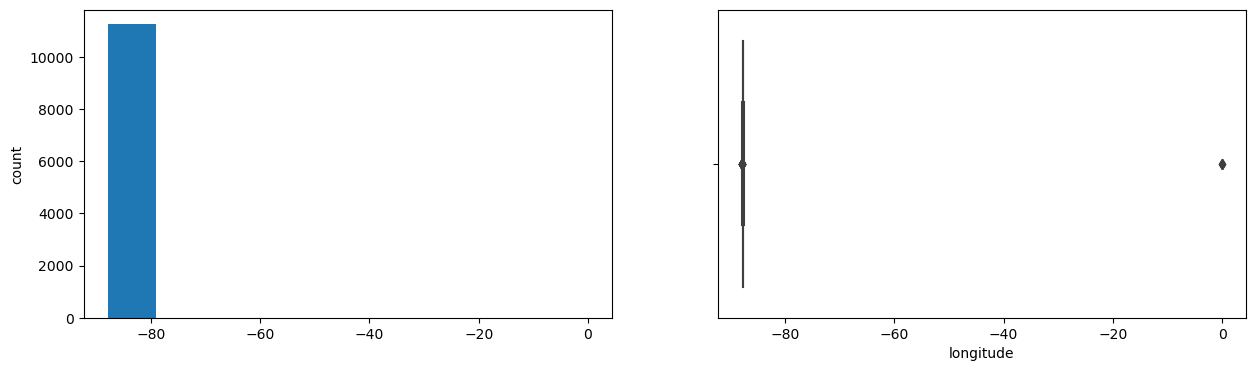

latitude
Skew : -59.79


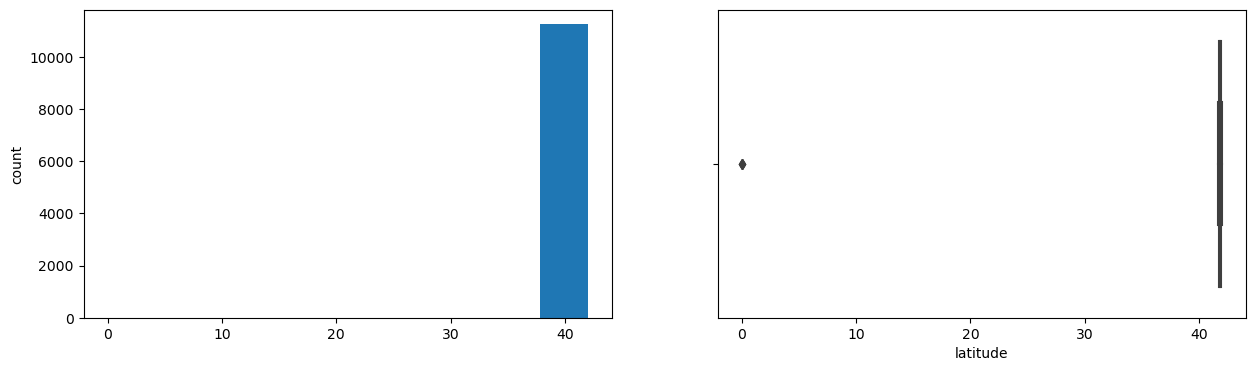

batas_kecepatan_terpasang
Skew : -1.8


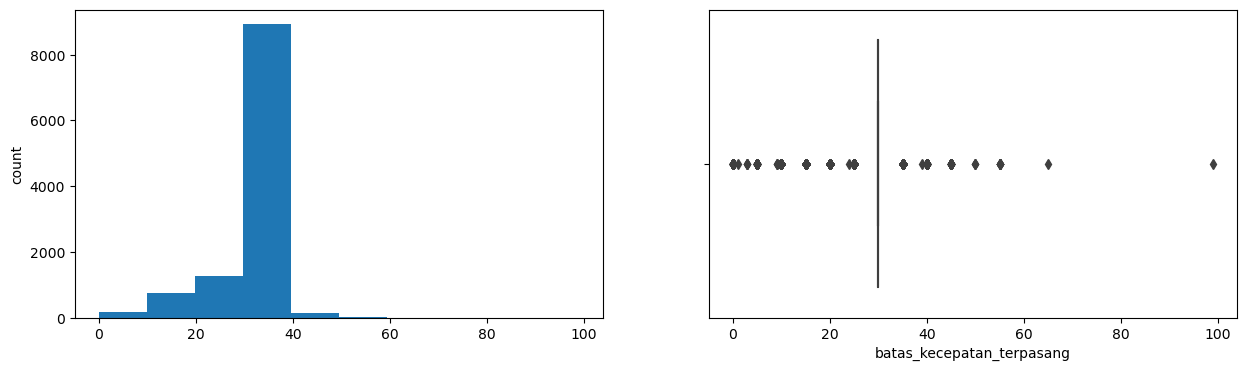

jumlah_unit
Skew : 2.39


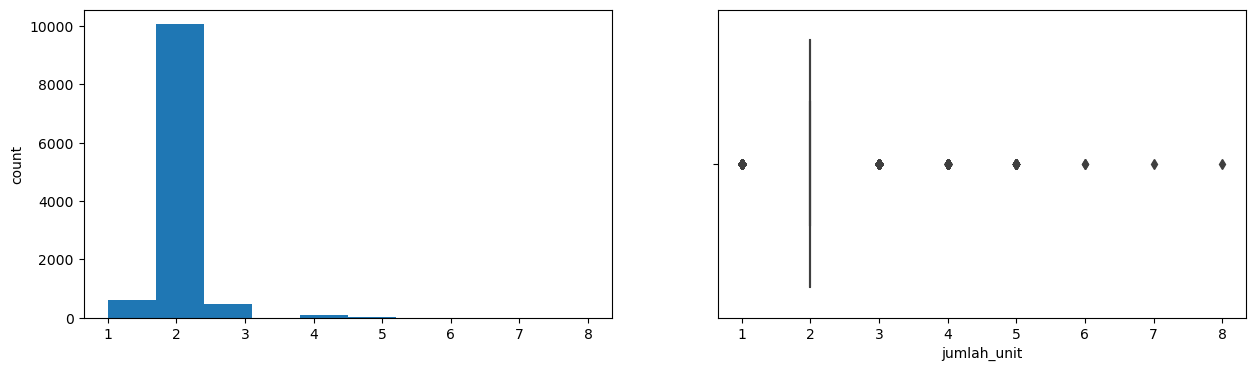

jumlah_cedera
Skew : 4.18


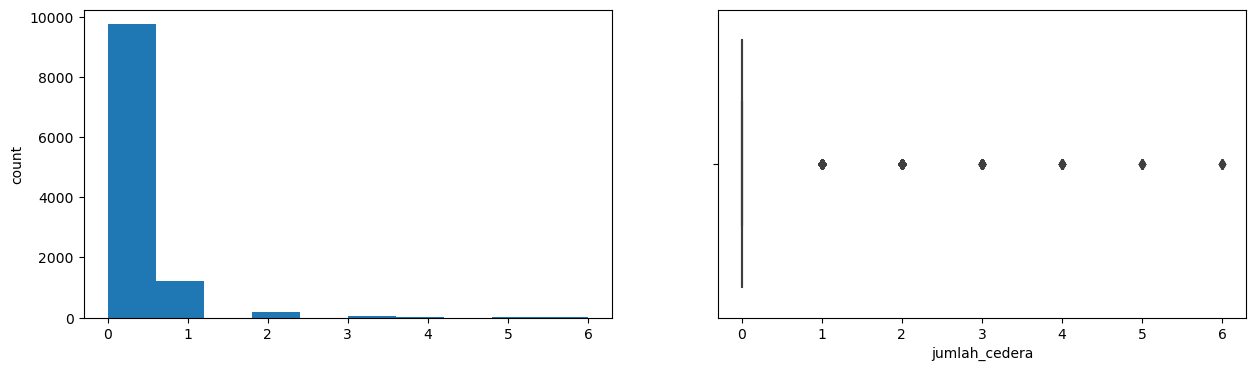

cedera_fatal
Skew : 47.41


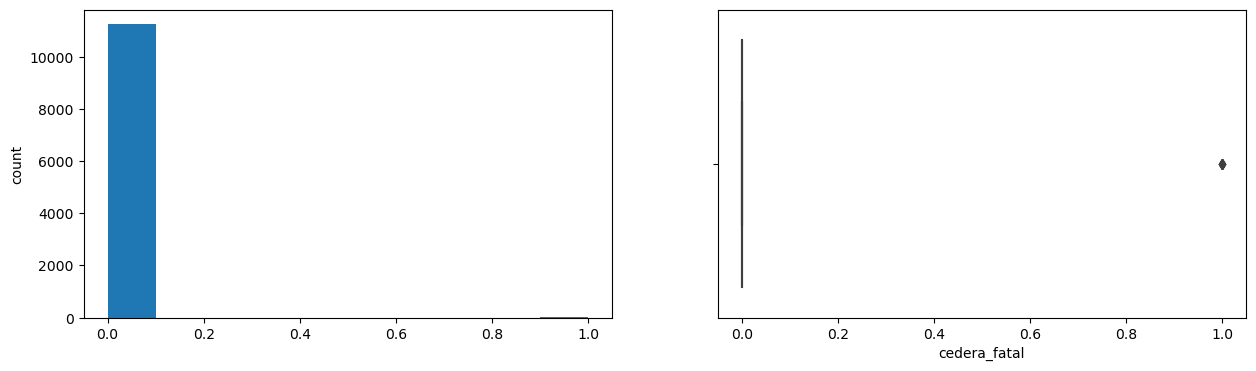

cedera_serius
Skew : 9.67


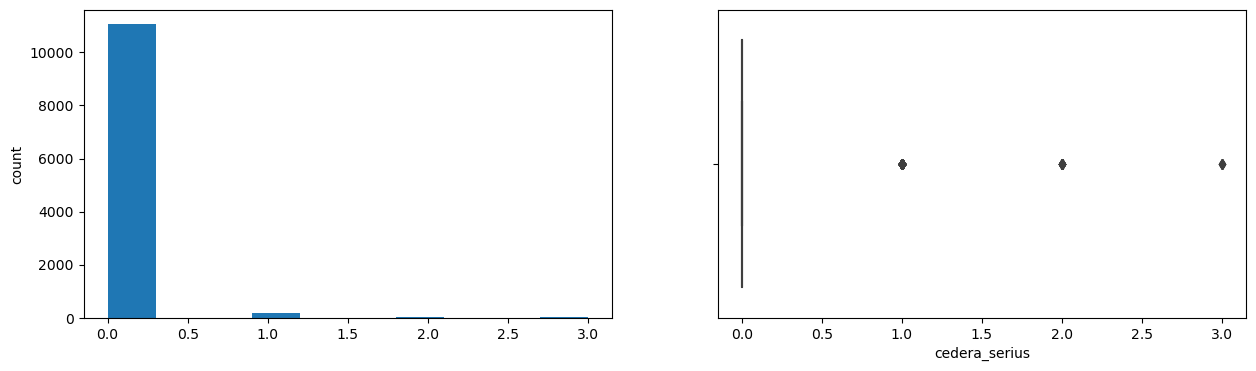

cedera_tidak_serius
Skew : 5.64


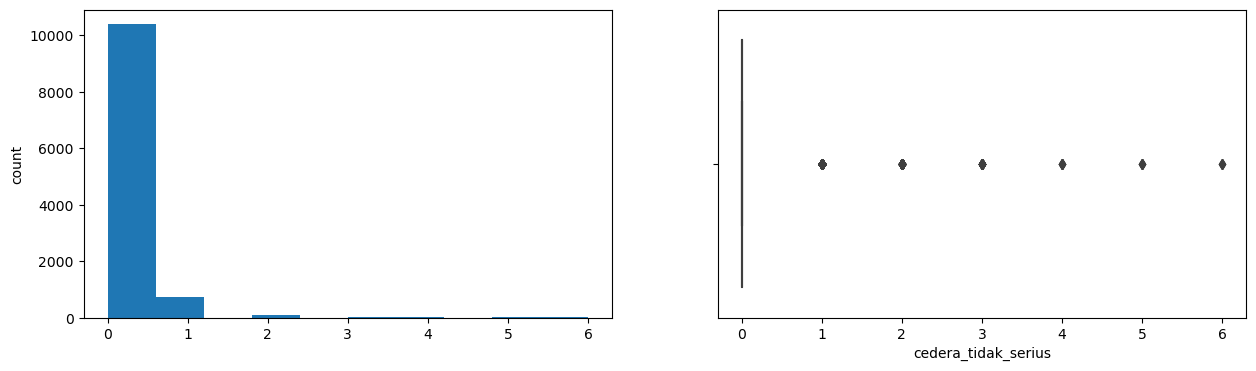

cedera_dilaporkan_tidak_nyata
Skew : 6.54


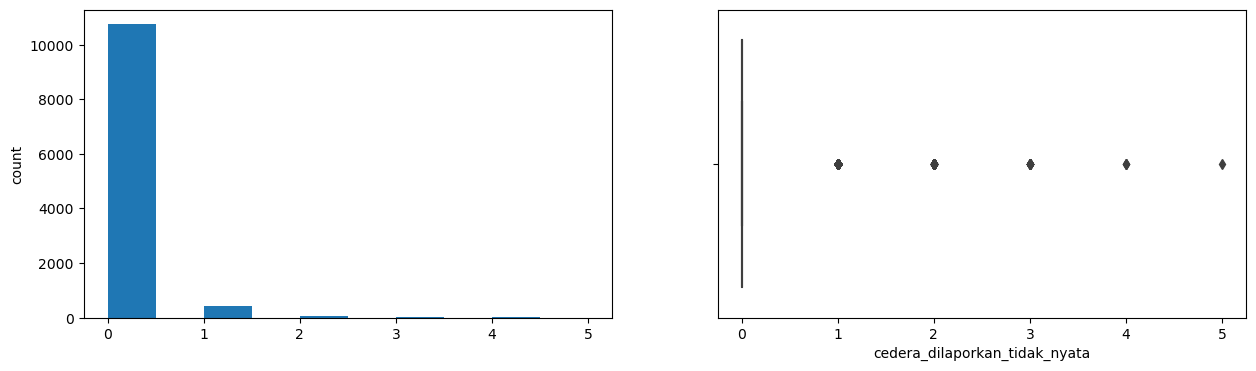

tidak_ada_indikasi_cedera
Skew : 4.46


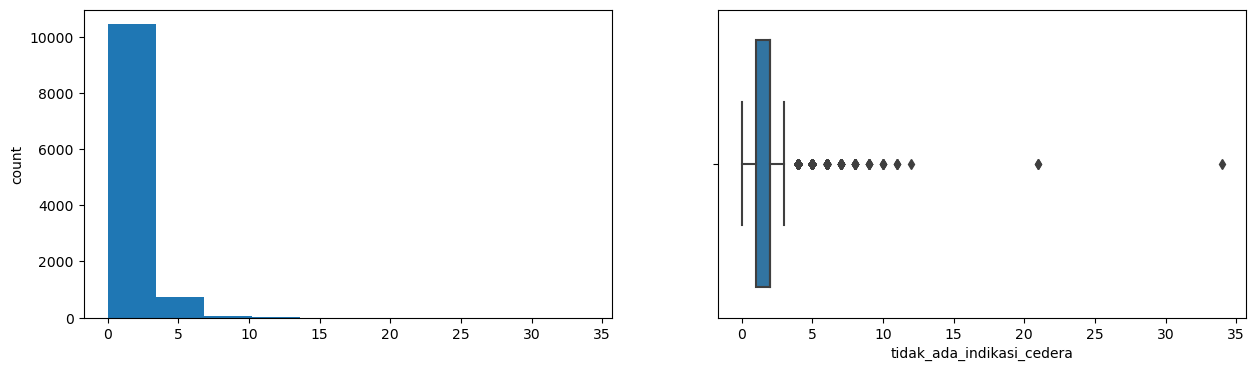

In [203]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

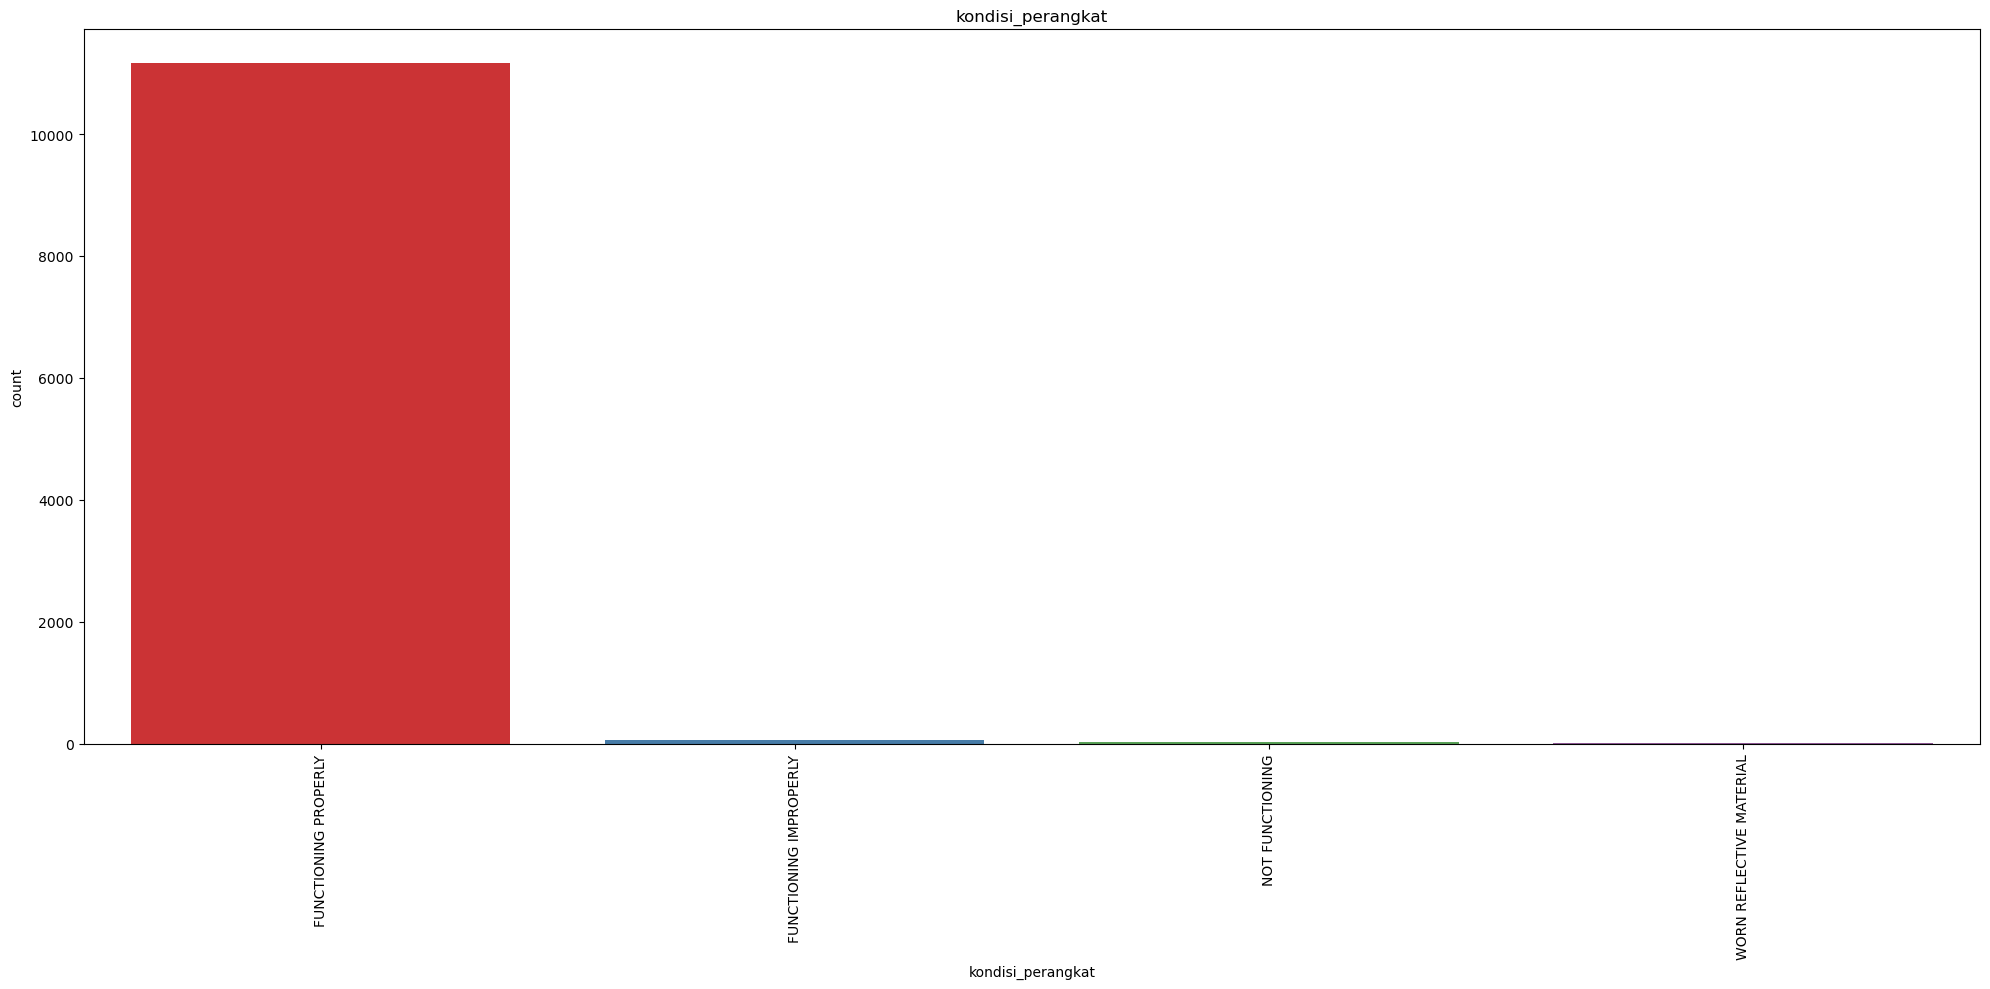

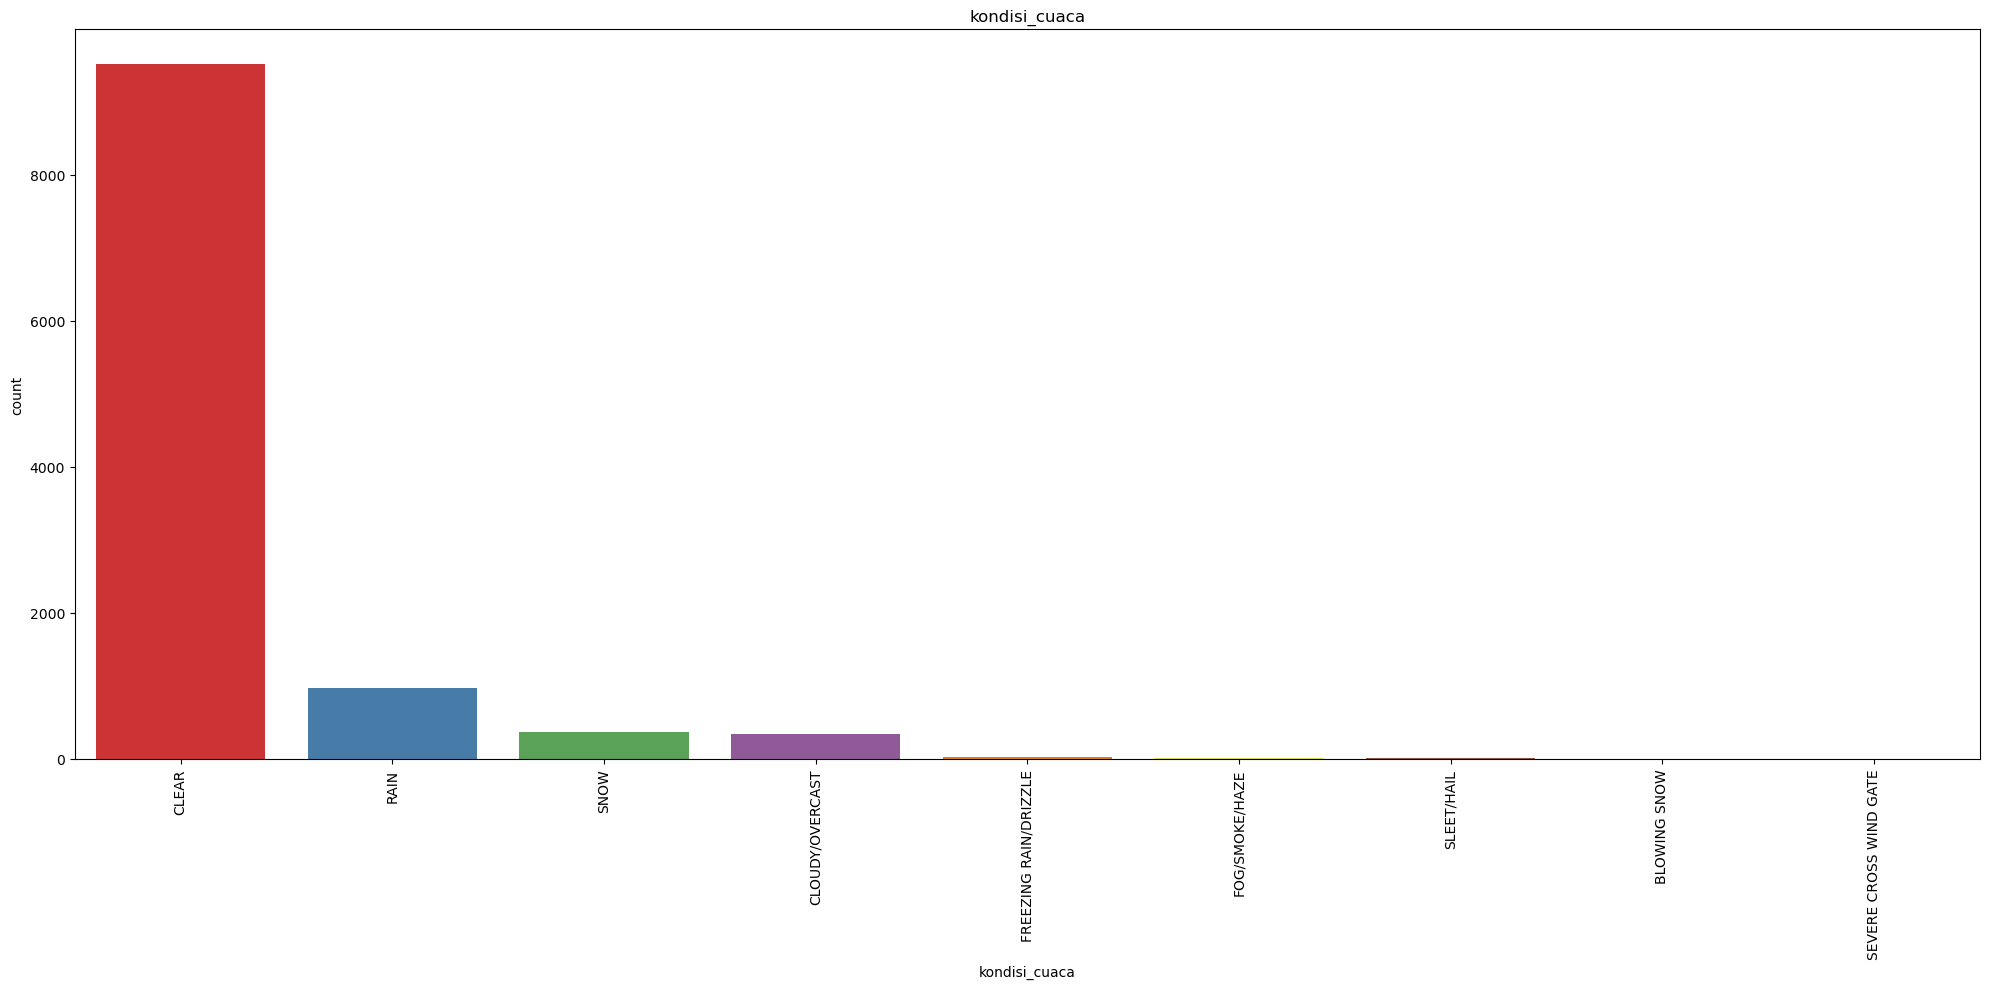

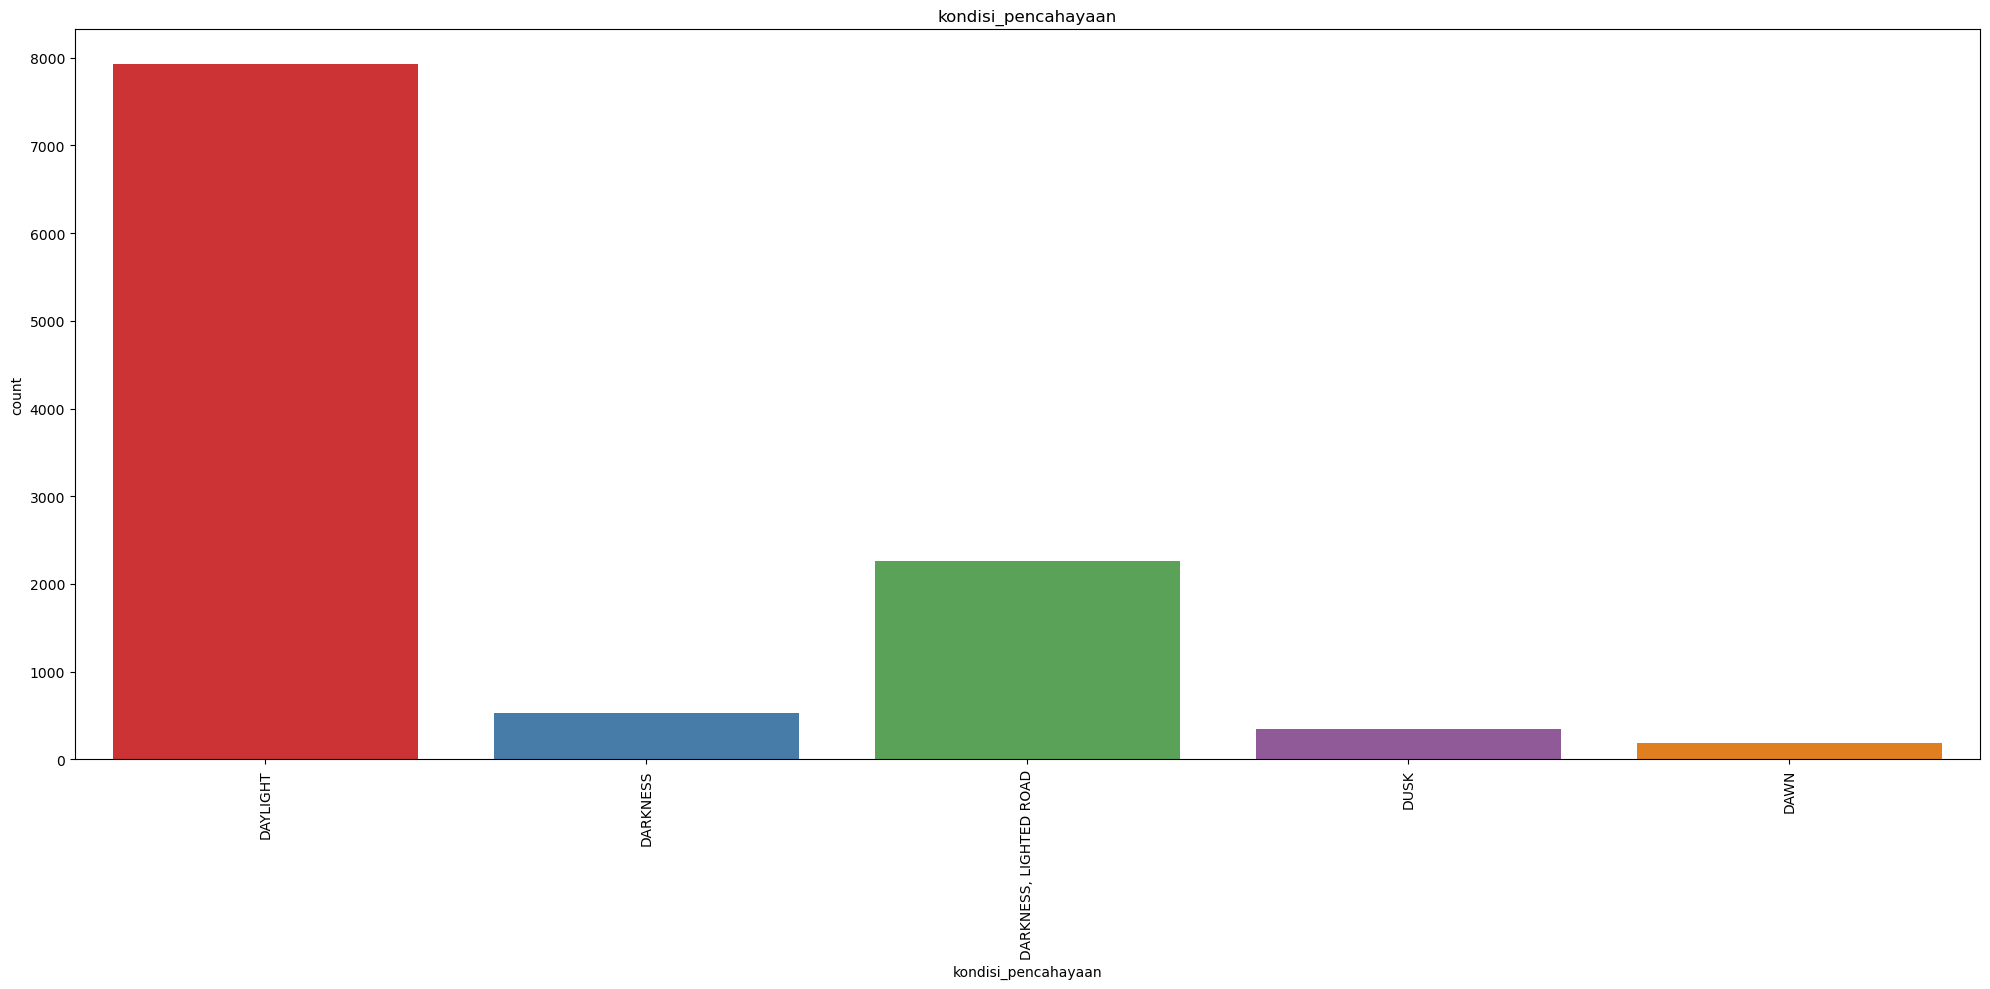

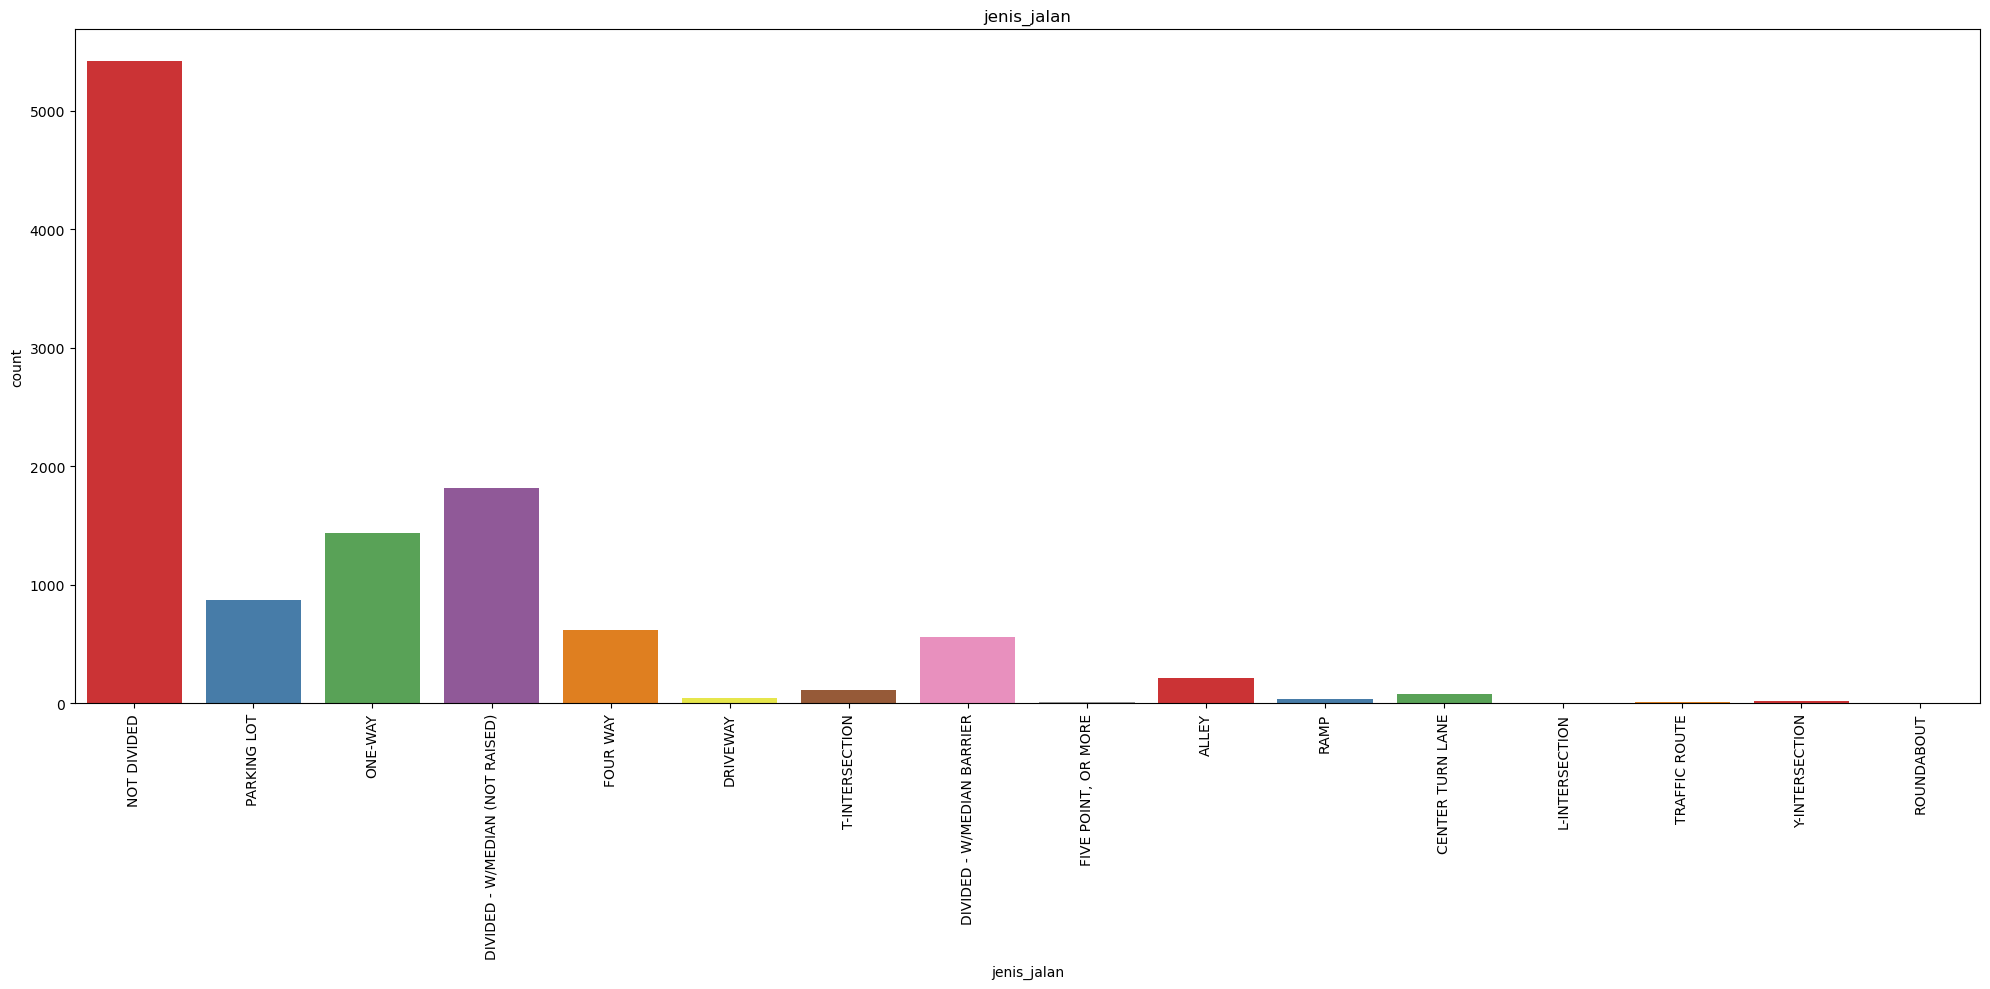

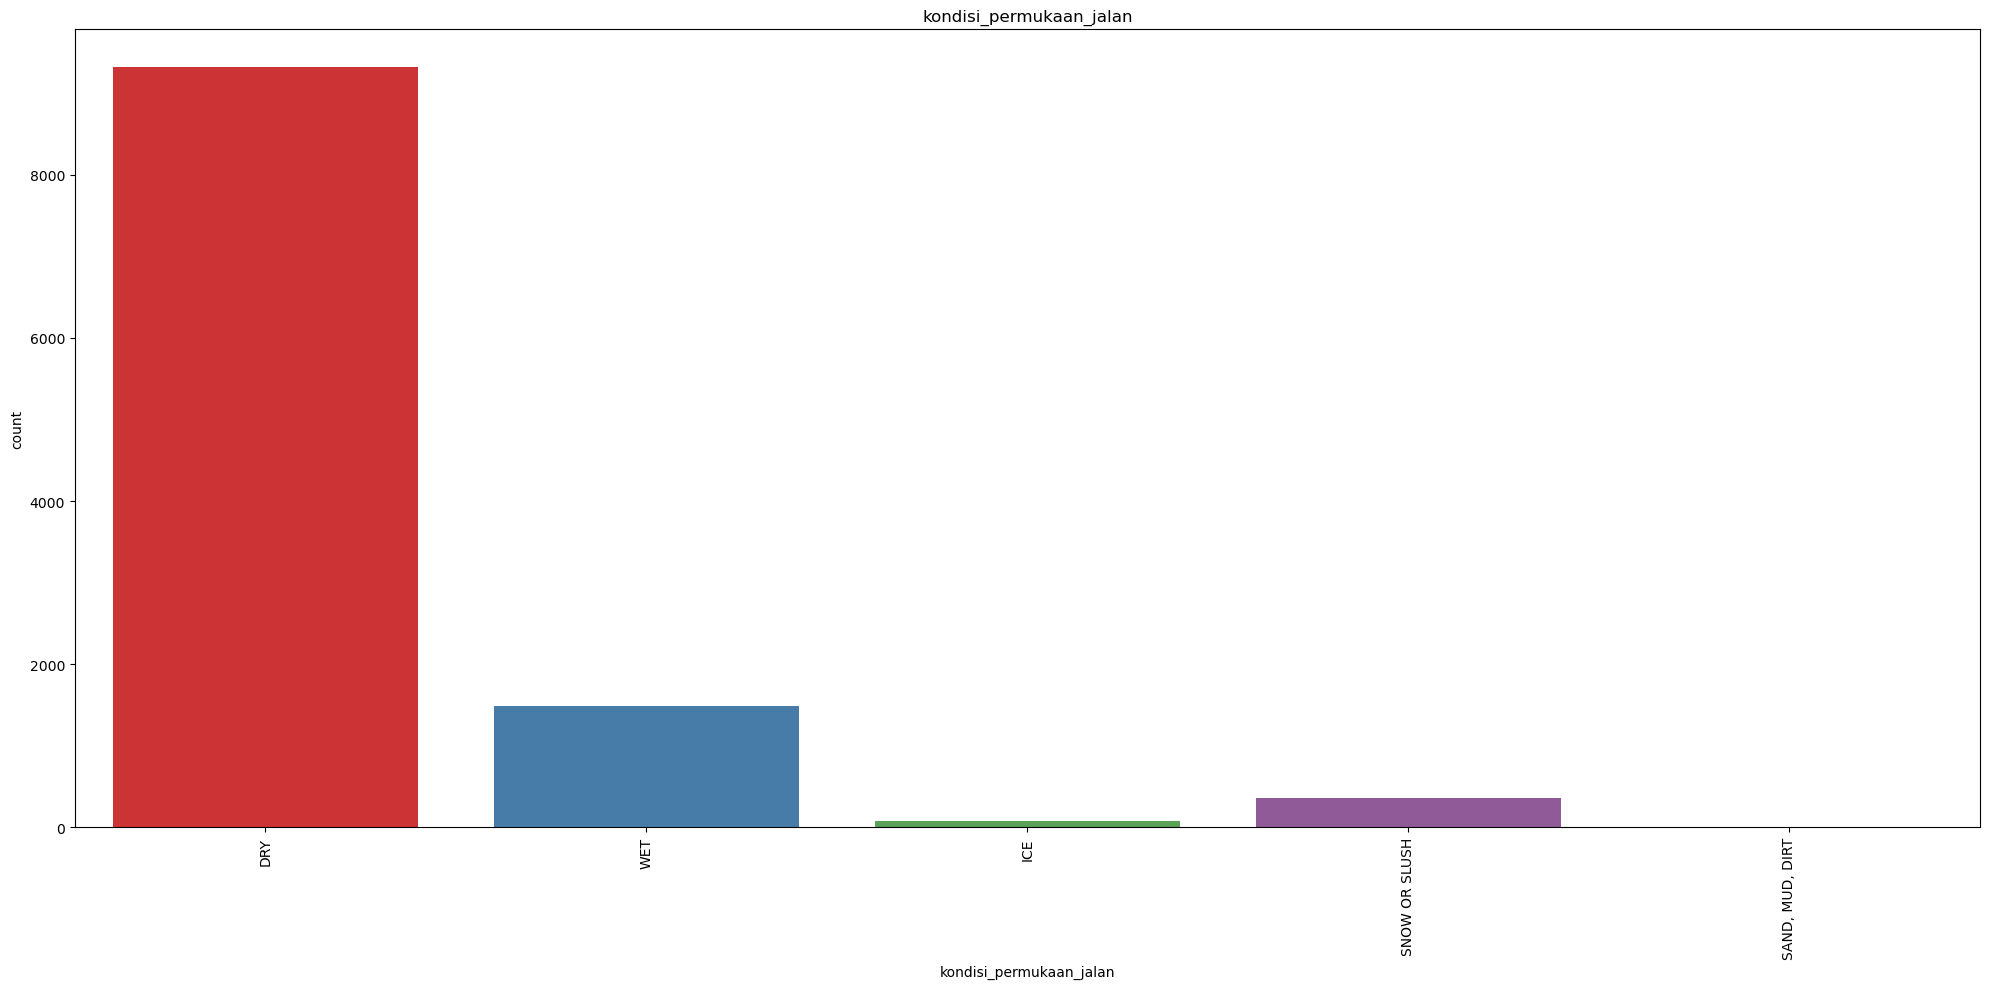

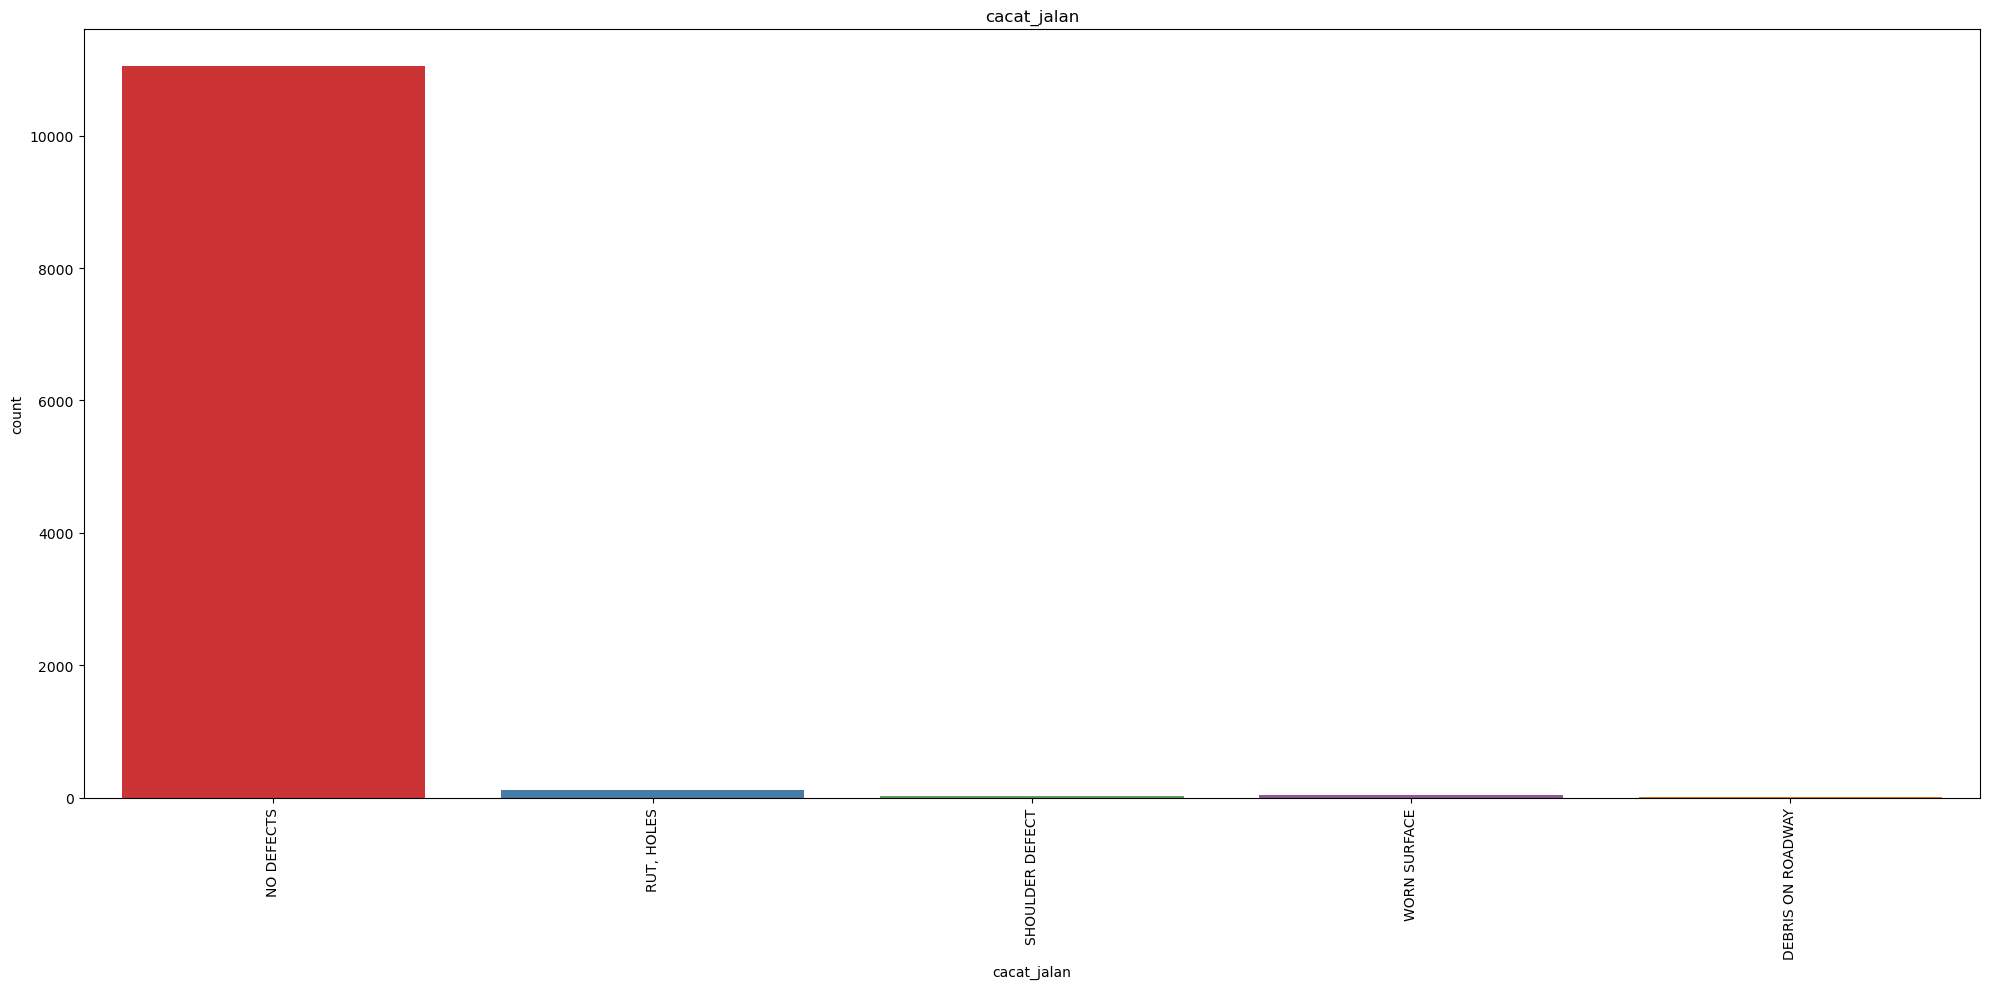

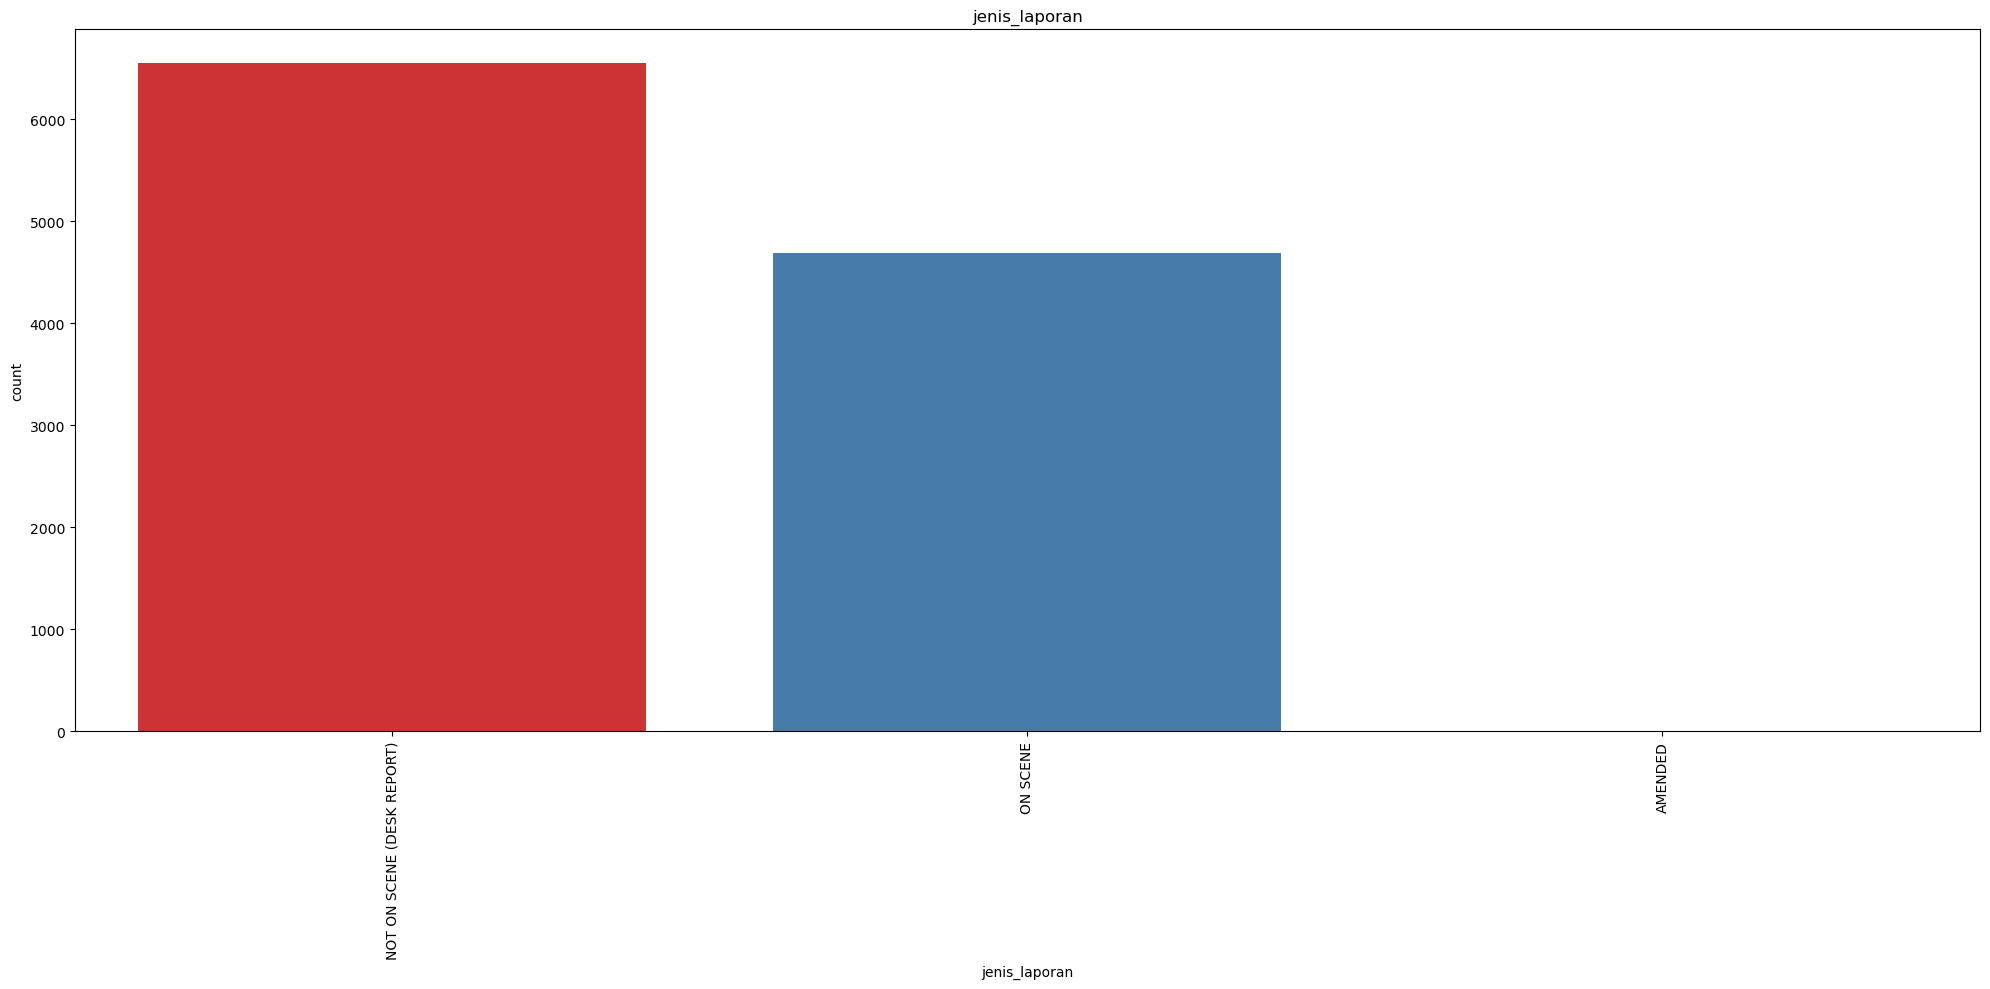

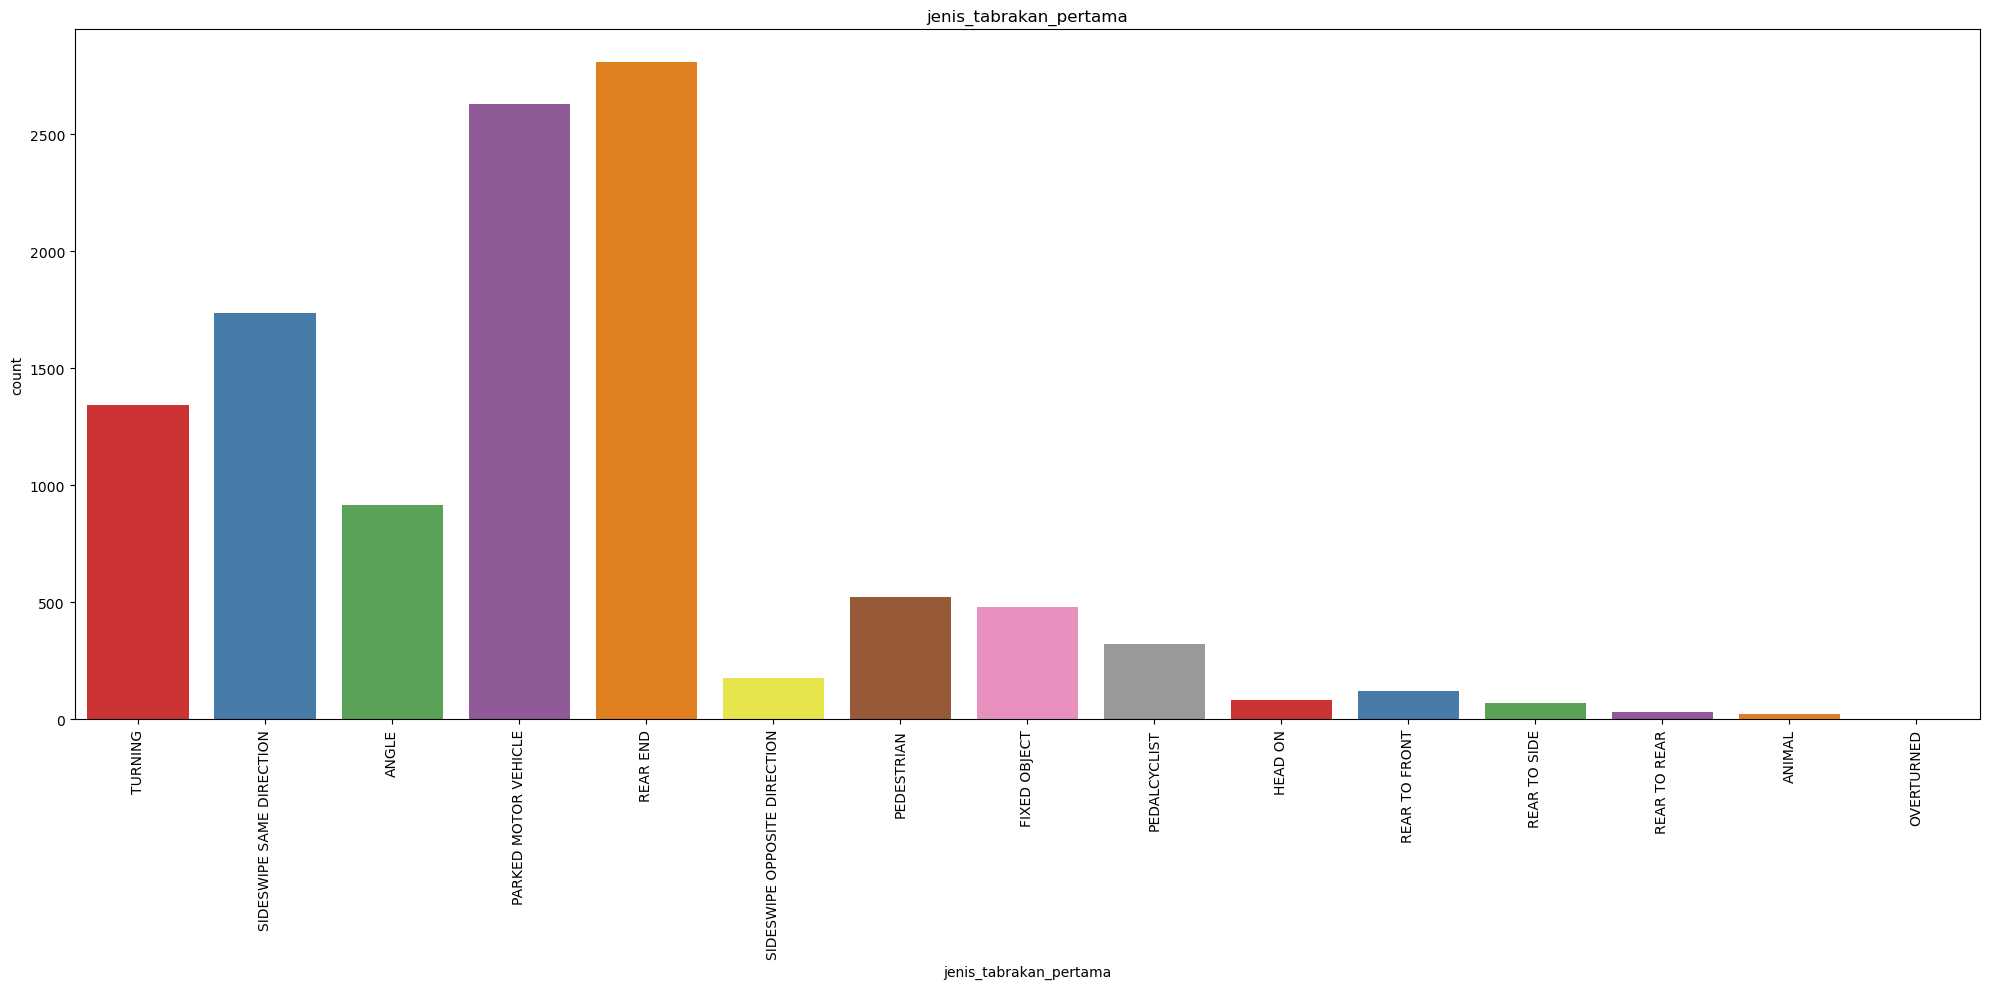

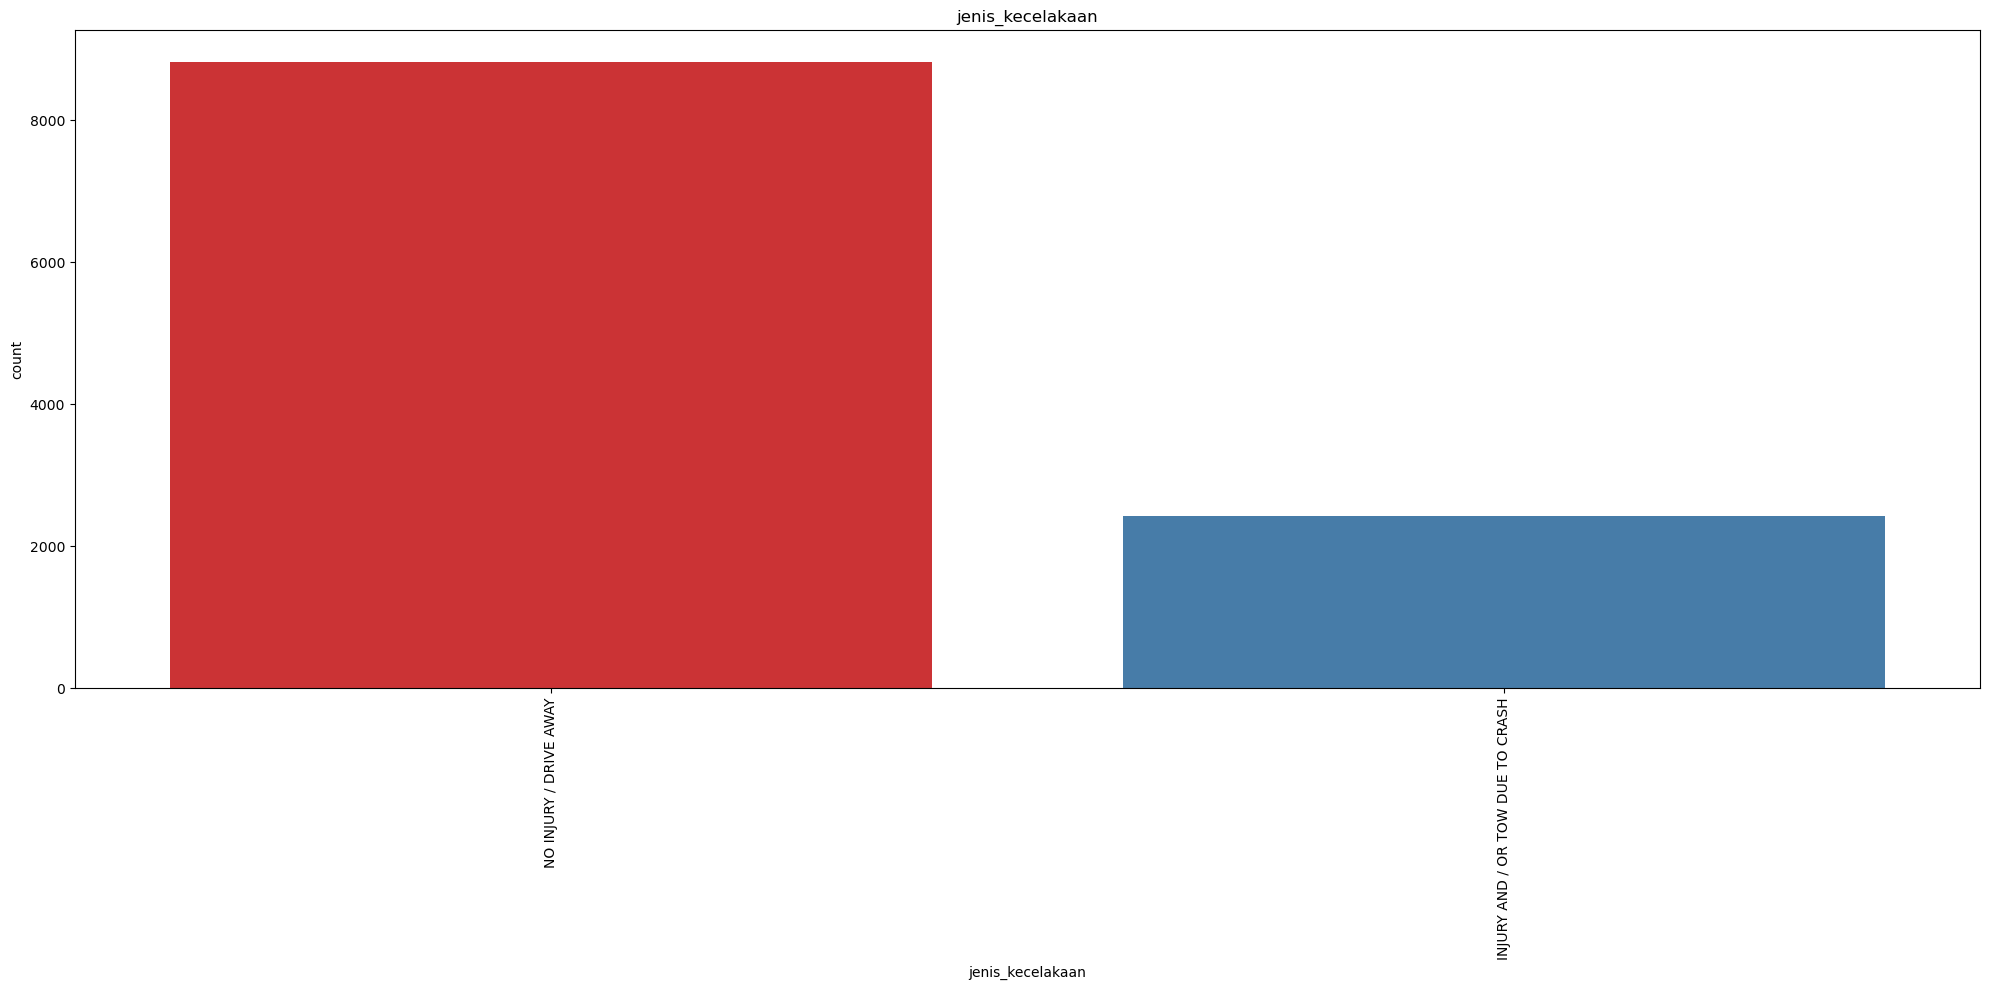

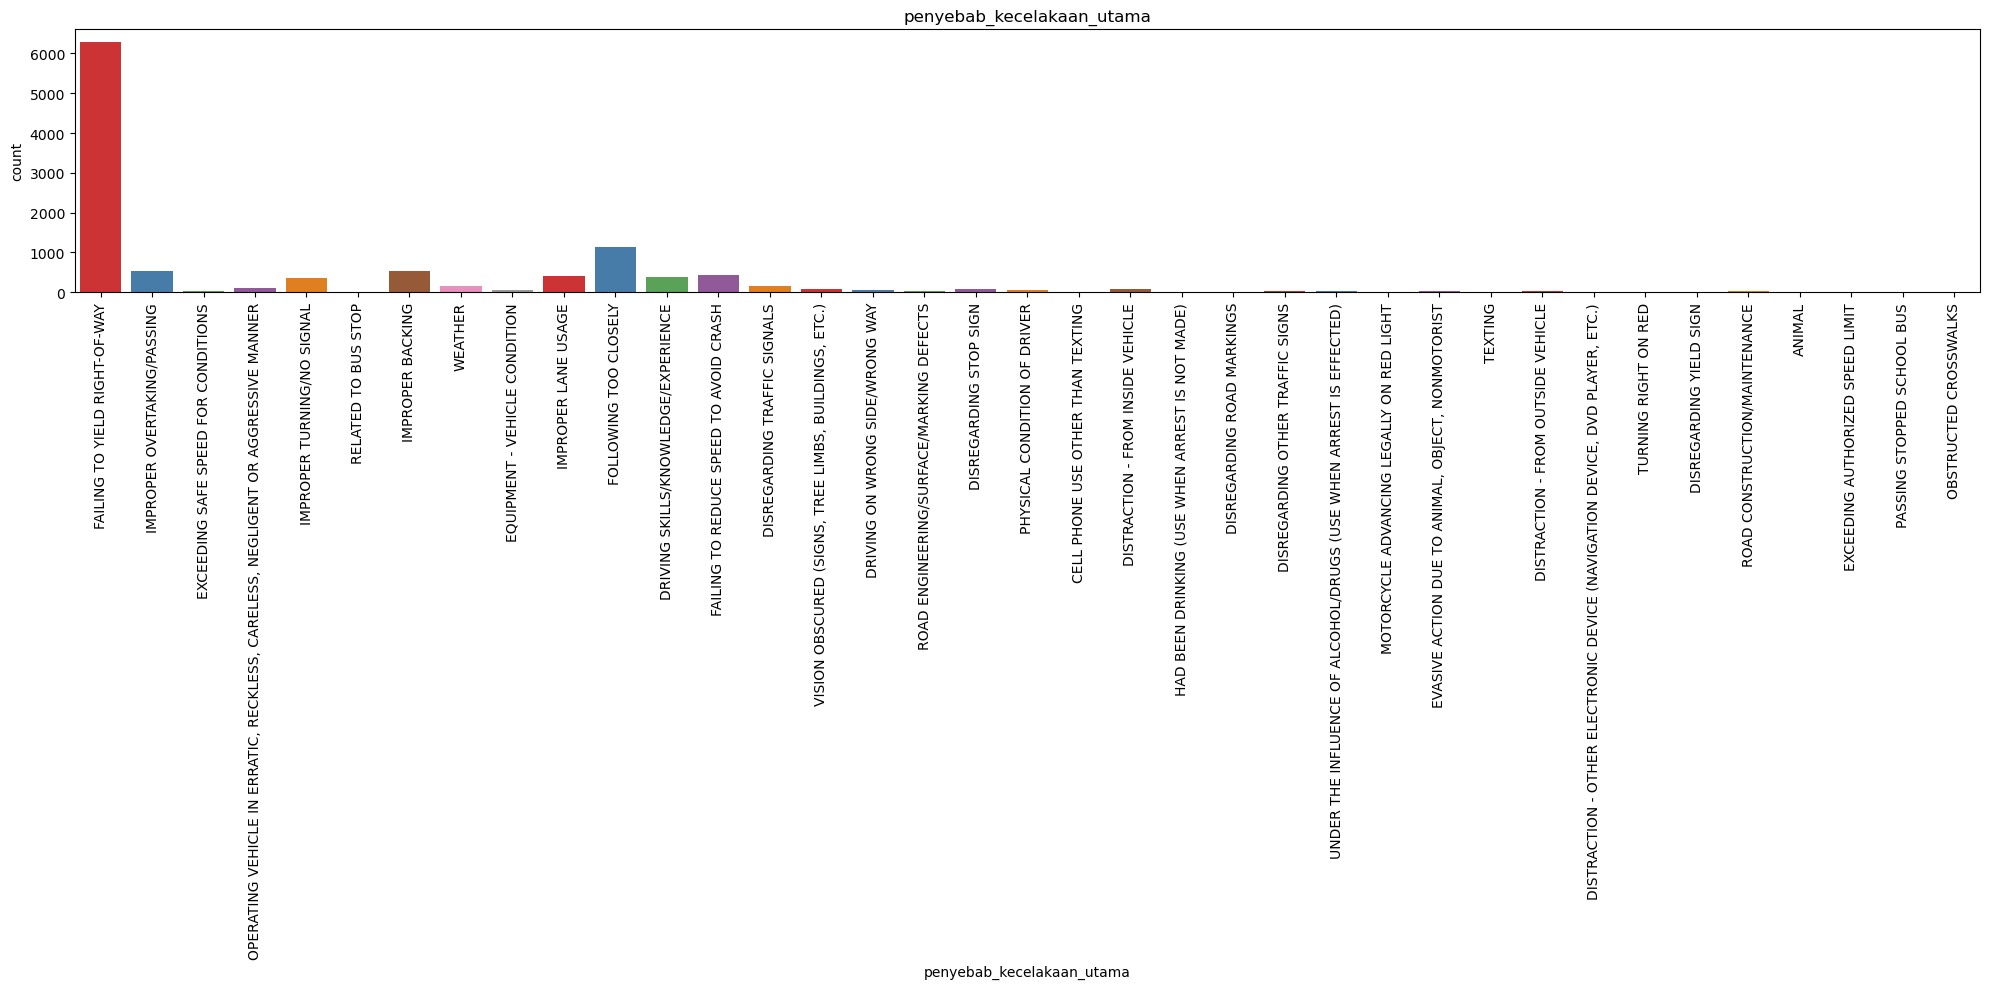

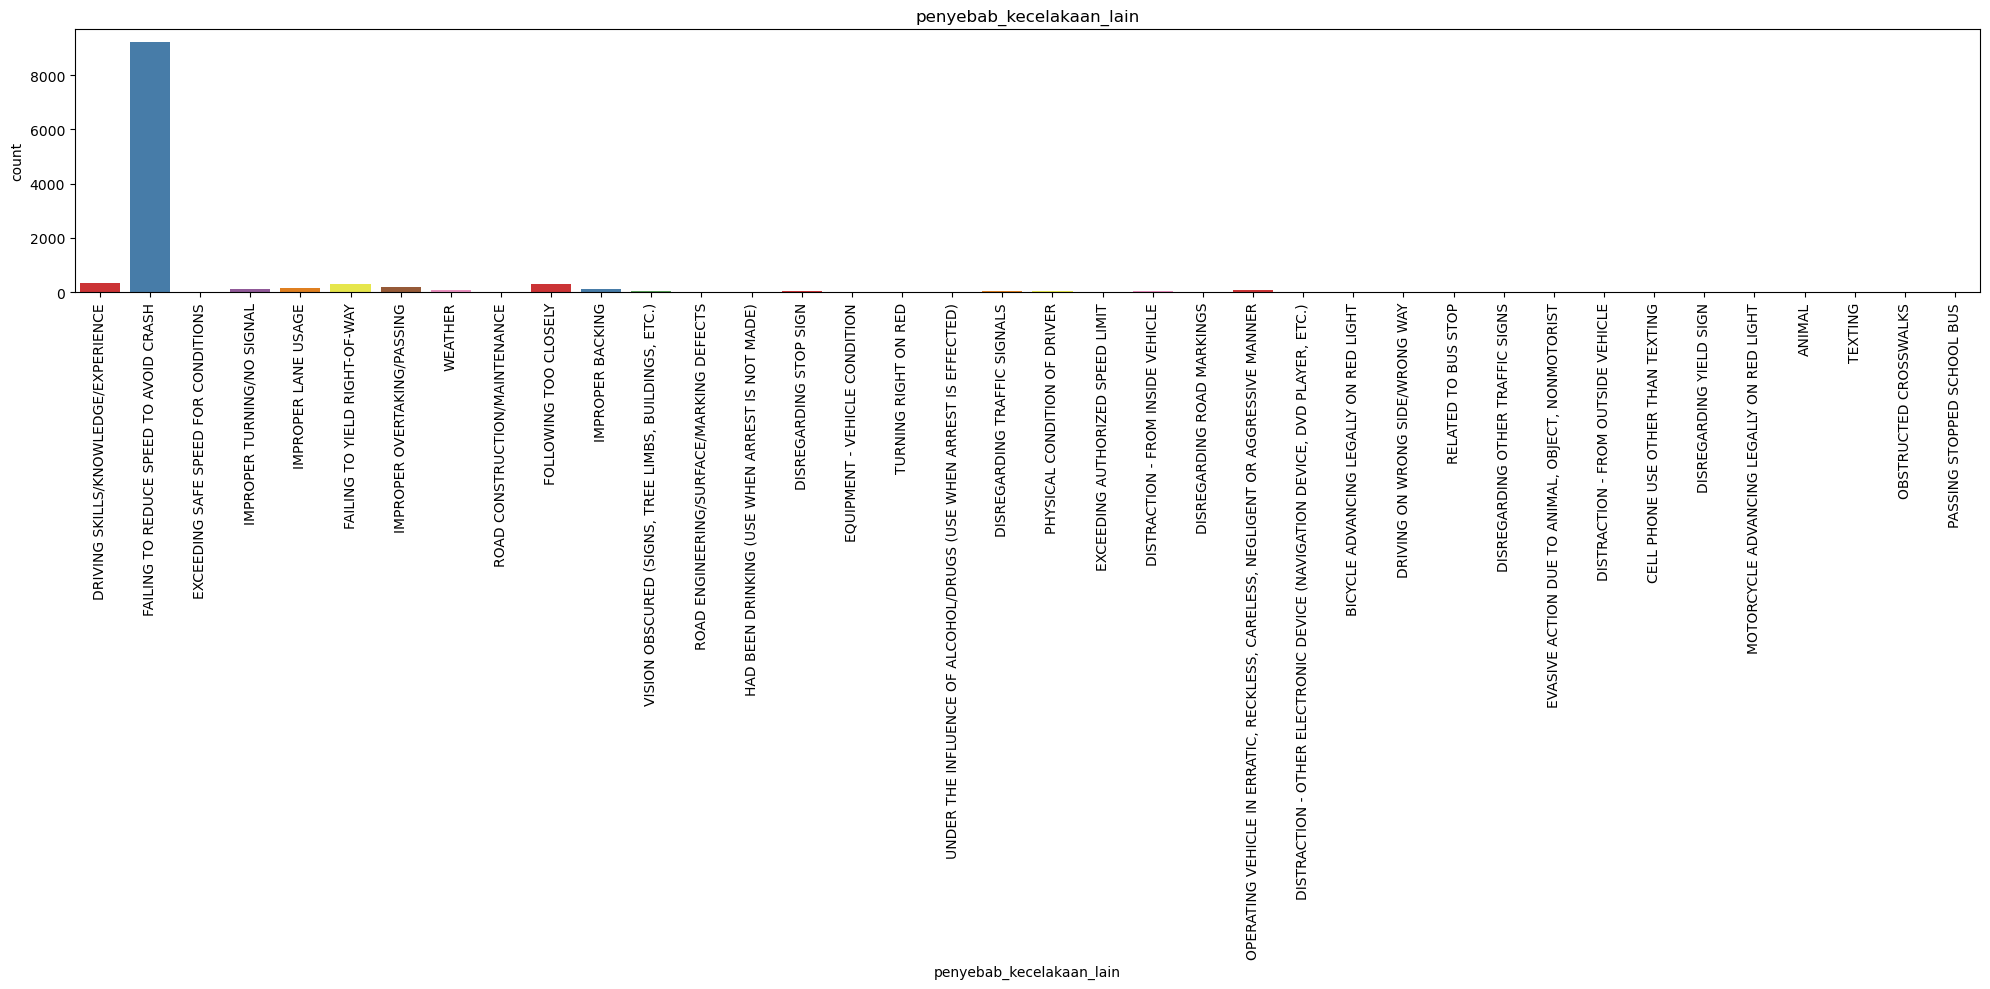

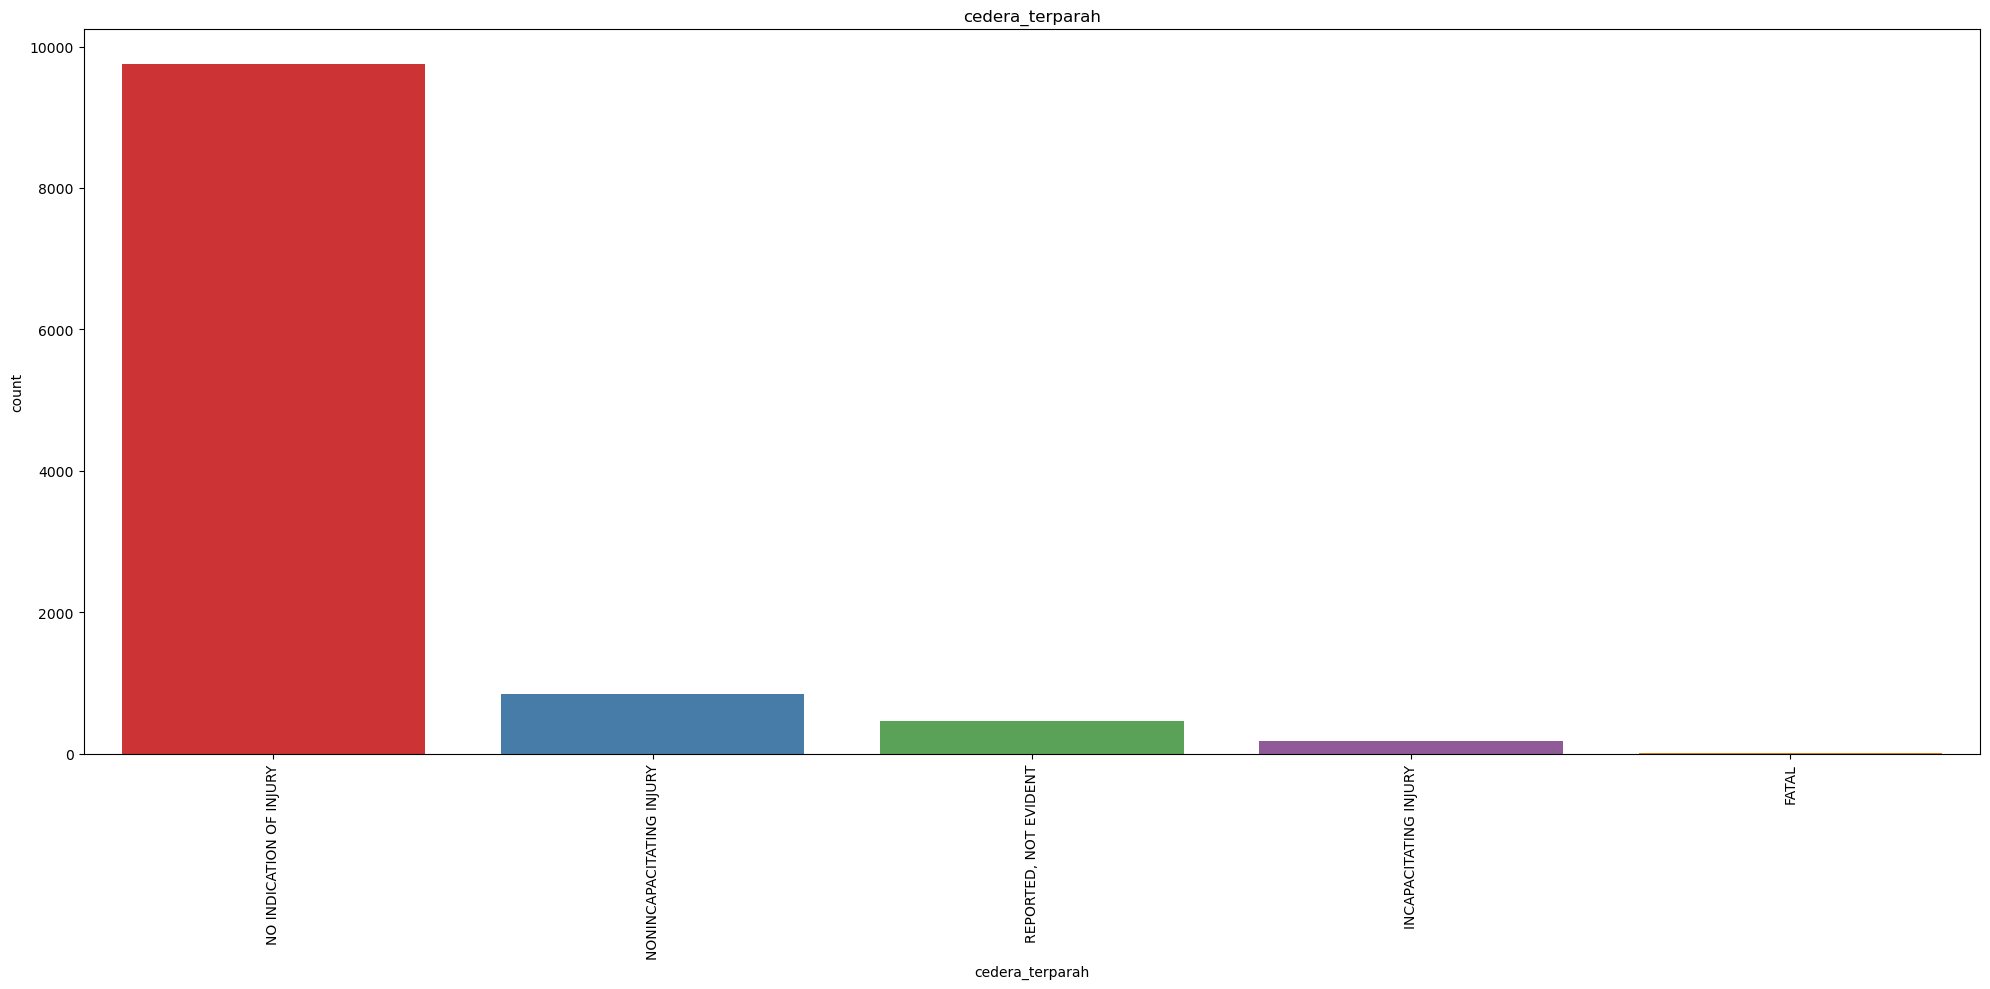

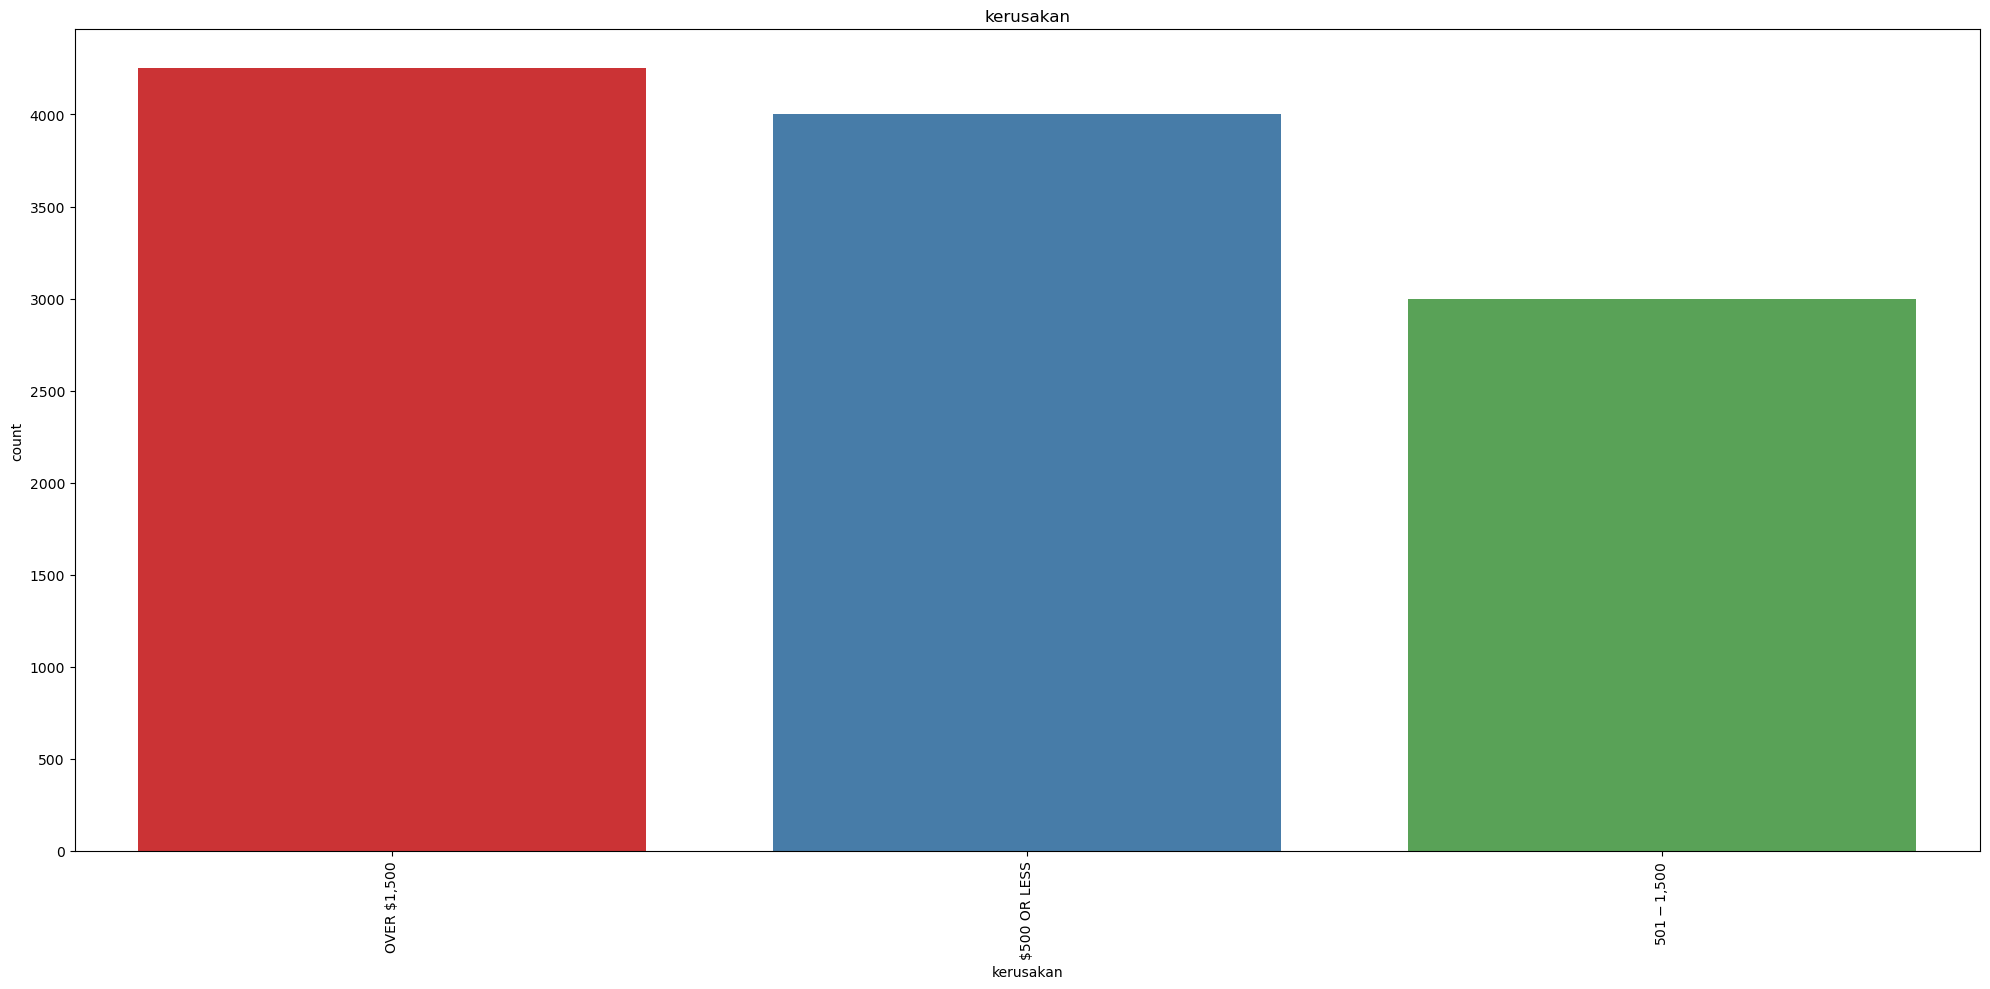

In [229]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    if(column != 'tanggal_kecelakaan'):
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column, palette=color_palette)
        plt.xticks(rotation=90)
        plt.title(column)
        plt.tight_layout()
        plt.show()

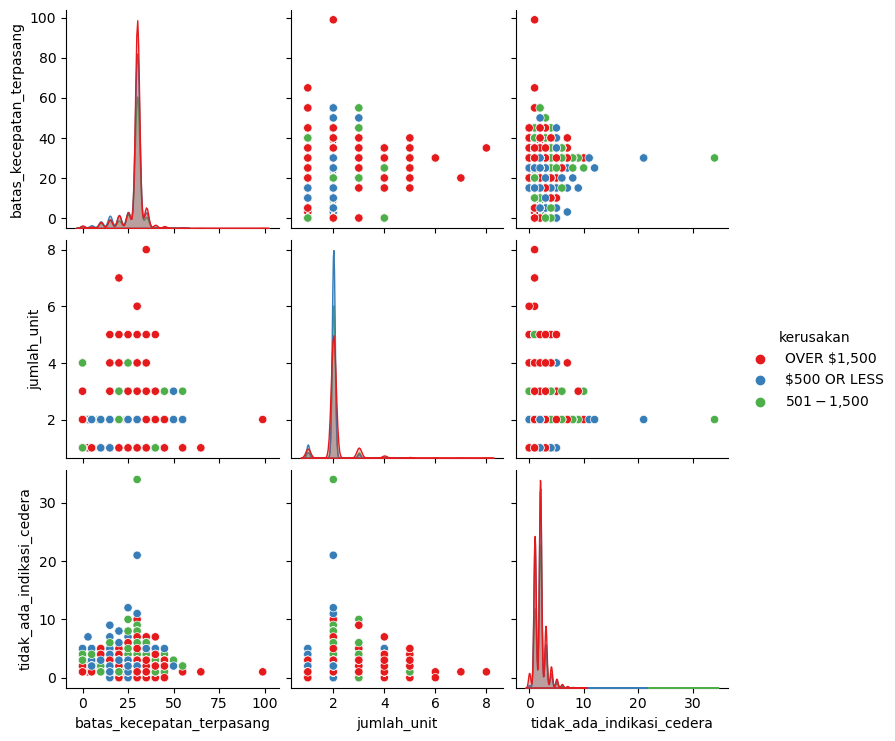

In [180]:
combined_df = pd.concat([df[num_cols], df['kerusakan']], axis=1)
sns.pairplot(combined_df, hue='kerusakan', palette='Set1')
plt.show()

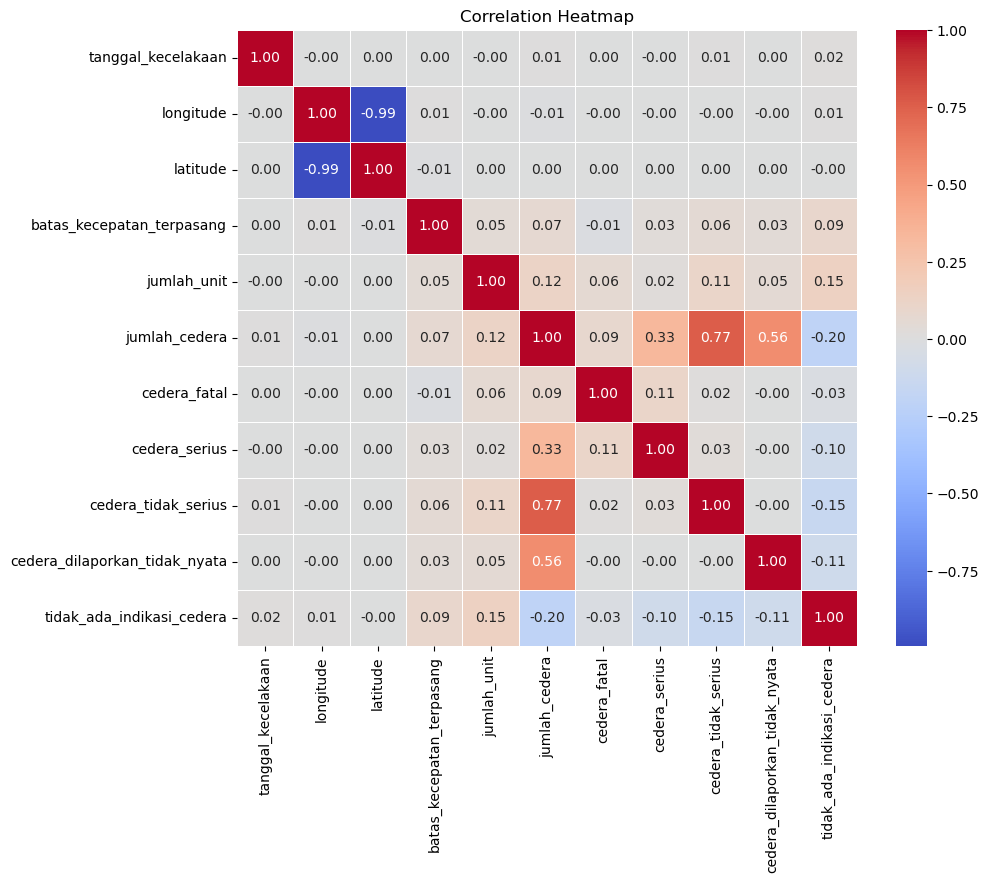

In [59]:
corr_matrix = df.corr()

# Mengatur ukuran figure
plt.figure(figsize=(10, 8))

# Membuat heatmap menggunakan seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Heatmap")

# Menampilkan heatmap
plt.show()

## Data Pre-Processing

We can see that `crash_record_id` has no effect on the prediction because it is an identifier, since this we can drop this column

In [204]:
df.drop(labels='crash_record_id',axis=1,inplace=True)

In [205]:
cat_cols.remove('crash_record_id')

From the Skew Matrix it can be seen that longitude and latitude are stacked on one value, this is abnormal and not useful in the model, we can drop

In [206]:
df.drop(labels=['longitude','latitude'],axis=1,inplace=True)

In [207]:
num_cols.remove('longitude')
num_cols.remove('latitude')

In [208]:
df.drop(labels=[
                'jumlah_cedera',
                'cedera_fatal',
                'cedera_serius',
                'cedera_tidak_serius',
                'cedera_dilaporkan_tidak_nyata'],axis=1,inplace=True)

In [209]:
to_remove = ['cedera_terparah', 'jumlah_cedera', 'cedera_fatal', 'cedera_serius','cedera_tidak_serius', 'cedera_dilaporkan_tidak_nyata']
for x in to_remove:
        if(x in num_cols):
            print(x," deleted")
            num_cols.remove(x)


jumlah_cedera  deleted
cedera_fatal  deleted
cedera_serius  deleted
cedera_tidak_serius  deleted
cedera_dilaporkan_tidak_nyata  deleted


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tanggal_kecelakaan         11250 non-null  object 
 1   batas_kecepatan_terpasang  11250 non-null  int64  
 2   kondisi_perangkat          11250 non-null  object 
 3   kondisi_cuaca              11250 non-null  object 
 4   kondisi_pencahayaan        11250 non-null  object 
 5   jenis_jalan                11250 non-null  object 
 6   kondisi_permukaan_jalan    11250 non-null  object 
 7   cacat_jalan                11250 non-null  object 
 8   jenis_laporan              11250 non-null  object 
 9   jenis_tabrakan_pertama     11250 non-null  object 
 10  jenis_kecelakaan           11250 non-null  object 
 11  jumlah_unit                11250 non-null  int64  
 12  penyebab_kecelakaan_utama  11250 non-null  object 
 13  penyebab_kecelakaan_lain   11250 non-null  obj

#### Convert Datetime Format from `tanggal_kecelakaan` to Integer - Timestamp

 Convert the datetime column to a pandas datetime object

In [211]:
df['tanggal_kecelakaan'] = pd.to_datetime(df['tanggal_kecelakaan'])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tanggal_kecelakaan         11250 non-null  datetime64[ns]
 1   batas_kecepatan_terpasang  11250 non-null  int64         
 2   kondisi_perangkat          11250 non-null  object        
 3   kondisi_cuaca              11250 non-null  object        
 4   kondisi_pencahayaan        11250 non-null  object        
 5   jenis_jalan                11250 non-null  object        
 6   kondisi_permukaan_jalan    11250 non-null  object        
 7   cacat_jalan                11250 non-null  object        
 8   jenis_laporan              11250 non-null  object        
 9   jenis_tabrakan_pertama     11250 non-null  object        
 10  jenis_kecelakaan           11250 non-null  object        
 11  jumlah_unit                11250 non-null  int64         
 12  peny

In [213]:
df['tanggal_kecelakaan'].head()

0   2018-06-01 16:35:00
1   2019-02-06 15:30:00
2   2017-06-17 22:05:00
3   2023-08-09 12:20:00
4   2023-09-17 16:19:00
Name: tanggal_kecelakaan, dtype: datetime64[ns]

Convert the datetime column to an integer then divide the resulting integer by the number of nanoseconds in a second

In [214]:
df['tanggal_kecelakaan'] = df['tanggal_kecelakaan'].values.astype(int)
df['tanggal_kecelakaan'] = df['tanggal_kecelakaan'].div(10**9)

In [215]:
df['tanggal_kecelakaan'].head()

0    0.287836
1   -0.298799
2    0.074217
3    1.642095
4    1.334086
Name: tanggal_kecelakaan, dtype: float64

In [216]:
df.head()

,tanggal_kecelakaan,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,jenis_tabrakan_pertama,jenis_kecelakaan,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,tidak_ada_indikasi_cedera,kerusakan
0,0.287836,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),TURNING,NO INJURY / DRIVE AWAY,2,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,2.0,"OVER $1,500"
1,-0.298799,30,NO CONTROLS,CLEAR,DARKNESS,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,2.0,$500 OR LESS
2,0.074217,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),ANGLE,NO INJURY / DRIVE AWAY,2,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,2.0,"$501 - $1,500"
3,1.642095,35,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,2.0,$500 OR LESS
4,1.334086,20,NO CONTROLS,CLEAR,DAYLIGHT,ONE-WAY,DRY,NO DEFECTS,ON SCENE,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,1.0,"OVER $1,500"


In [217]:

for col in cat_cols:
    print(f"{col}")
    print(f"{df[col].unique()[:20].tolist()}\n\n")

tanggal_kecelakaan
[0.28783616, -0.298799104, 0.074217472, 1.642094592, 1.334085632, 1.390598144, 1.650640896, 1.511919616, 1.43266816, -0.921899008, -0.308791296, 2.081538048, -0.345612288, -0.041668608, -1.513545728, -1.572450304, 0.26971136, 1.20856576, -0.82961408, -2.053423104]


kondisi_perangkat
['NO CONTROLS', 'UNKNOWN', 'FUNCTIONING PROPERLY', 'FUNCTIONING IMPROPERLY', 'NOT FUNCTIONING', 'OTHER', 'WORN REFLECTIVE MATERIAL', 'MISSING']


kondisi_cuaca
['CLEAR', 'UNKNOWN', 'RAIN', 'SNOW', 'CLOUDY/OVERCAST', 'FREEZING RAIN/DRIZZLE', 'FOG/SMOKE/HAZE', 'OTHER', 'SLEET/HAIL', 'BLOWING SNOW', 'SEVERE CROSS WIND GATE']


kondisi_pencahayaan
['DAYLIGHT', 'DARKNESS', 'DARKNESS, LIGHTED ROAD', 'DUSK', 'UNKNOWN', 'DAWN']


jenis_jalan
['NOT DIVIDED', 'PARKING LOT', 'ONE-WAY', 'DIVIDED - W/MEDIAN (NOT RAISED)', 'FOUR WAY', 'DRIVEWAY', 'T-INTERSECTION', 'DIVIDED - W/MEDIAN BARRIER', 'UNKNOWN', 'FIVE POINT, OR MORE', 'ALLEY', 'RAMP', 'CENTER TURN LANE', 'OTHER', 'L-INTERSECTION', 'TRAFFIC RO

In [218]:
NaNPhrase= {
    'kondisi_perangkat': ['UNKNOWN', 'NO CONTROLS', 'MISSING', 'OTHER'],
    'kondisi_cuaca': ['UNKNOWN', 'OTHER'],
    'kondisi_pencahayaan': ['UNKNOWN'],
    'jenis_jalan': ['UNKNOWN', 'NOT REPORTED', 'UNKNOWN INTERSECTION TYPE', 'OTHER'],
    'kondisi_permukaan_jalan': ['UNKNOWN', 'OTHER'],
    'cacat_jalan': ['UNKNOWN', 'OTHER'],
    'jenis_laporan': [],
    'jenis_tabrakan_pertama': ['OTHER OBJECT', 'OTHER NONCOLLISION'],
    'jenis_kecelakaan': [],
    'penyebab_kecelakaan_utama': ['UNABLE TO DETERMINE', 'NOT APPLICABLE'],
    'penyebab_kecelakaan_lain': ['UNABLE TO DETERMINE', 'NOT APPLICABLE'],
    'cedera_terparah': [],
    'kerusakan': []
}

In [219]:
for col, phrases in NaNPhrase.items():
        if col in df.columns:
            # Mengganti nilai-nilai yang sesuai dengan NaNPhrase menjadi NaN
            df[col] = df[col].replace(phrases, pd.NA)
            # Mengisi NaN dengan mode dari kolom tersebut
            mode = df[col].mode()[0] if not df[col].mode().empty else None
            if mode is not None:
                df[col] = df[col].fillna(mode)

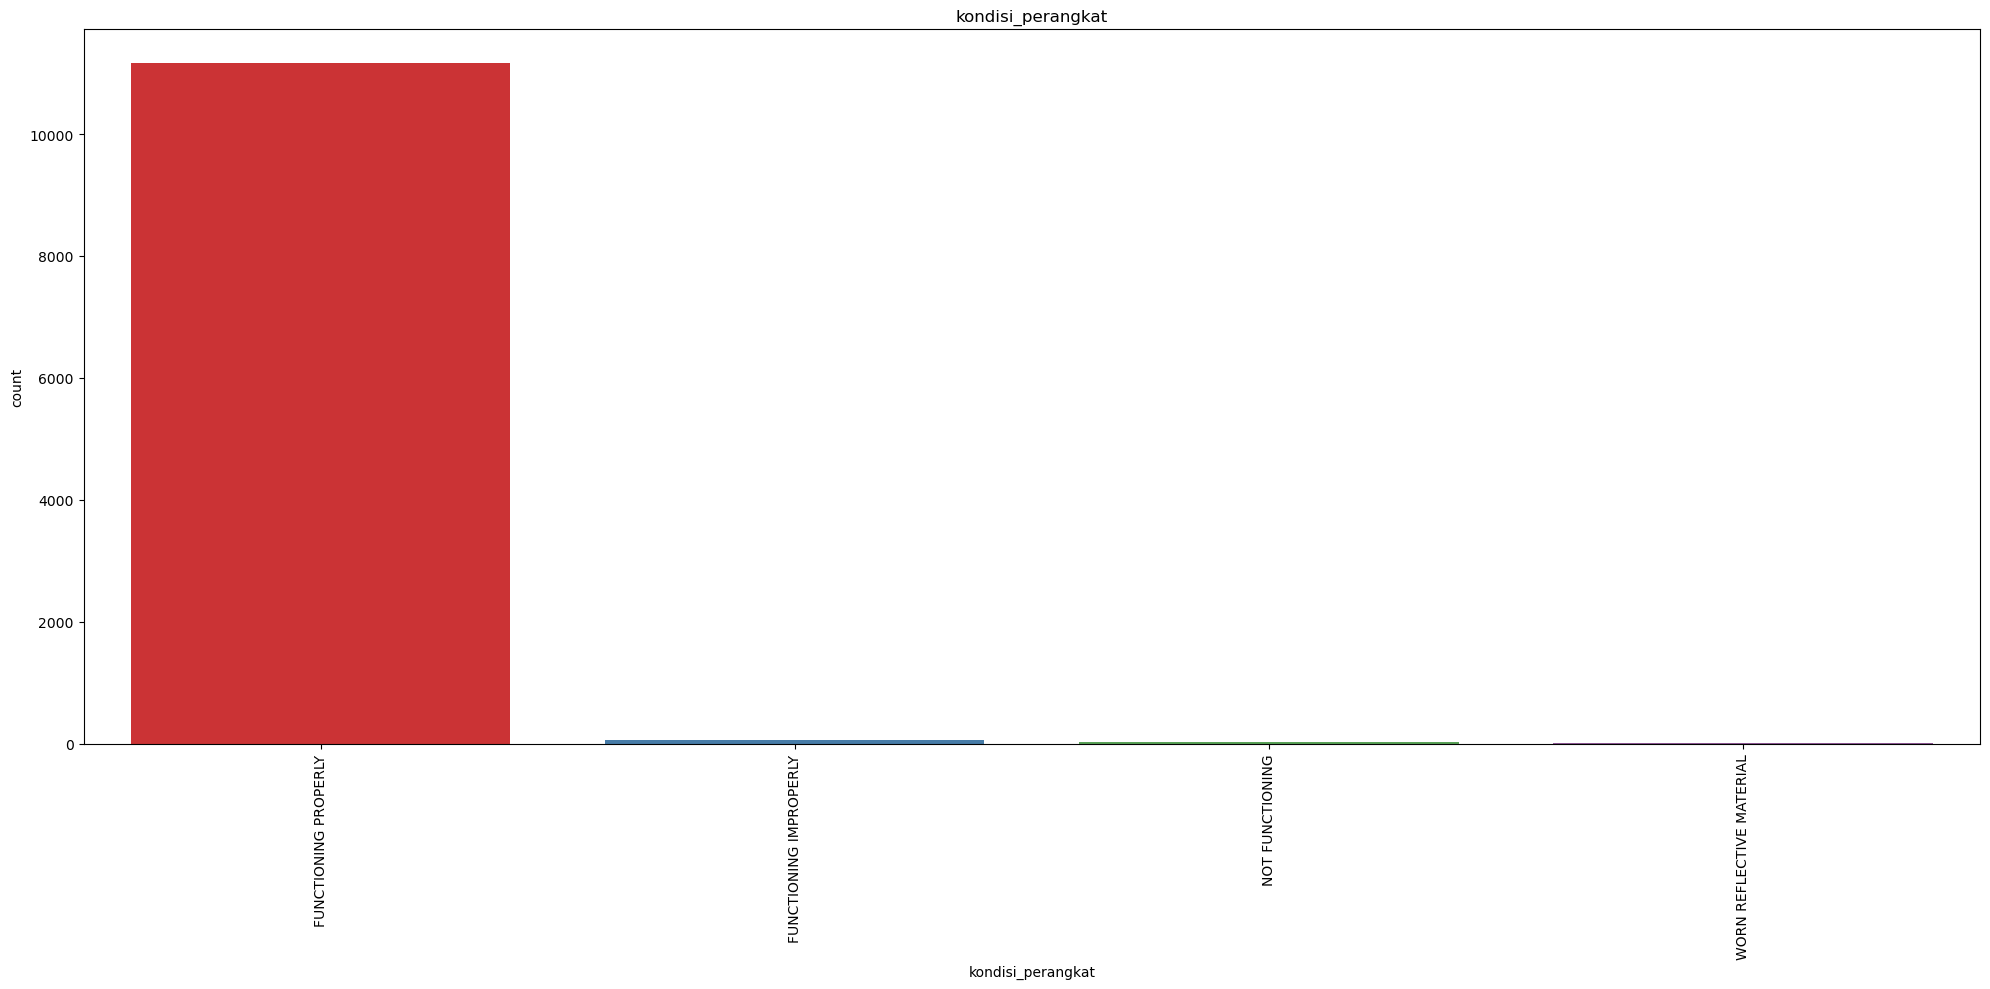

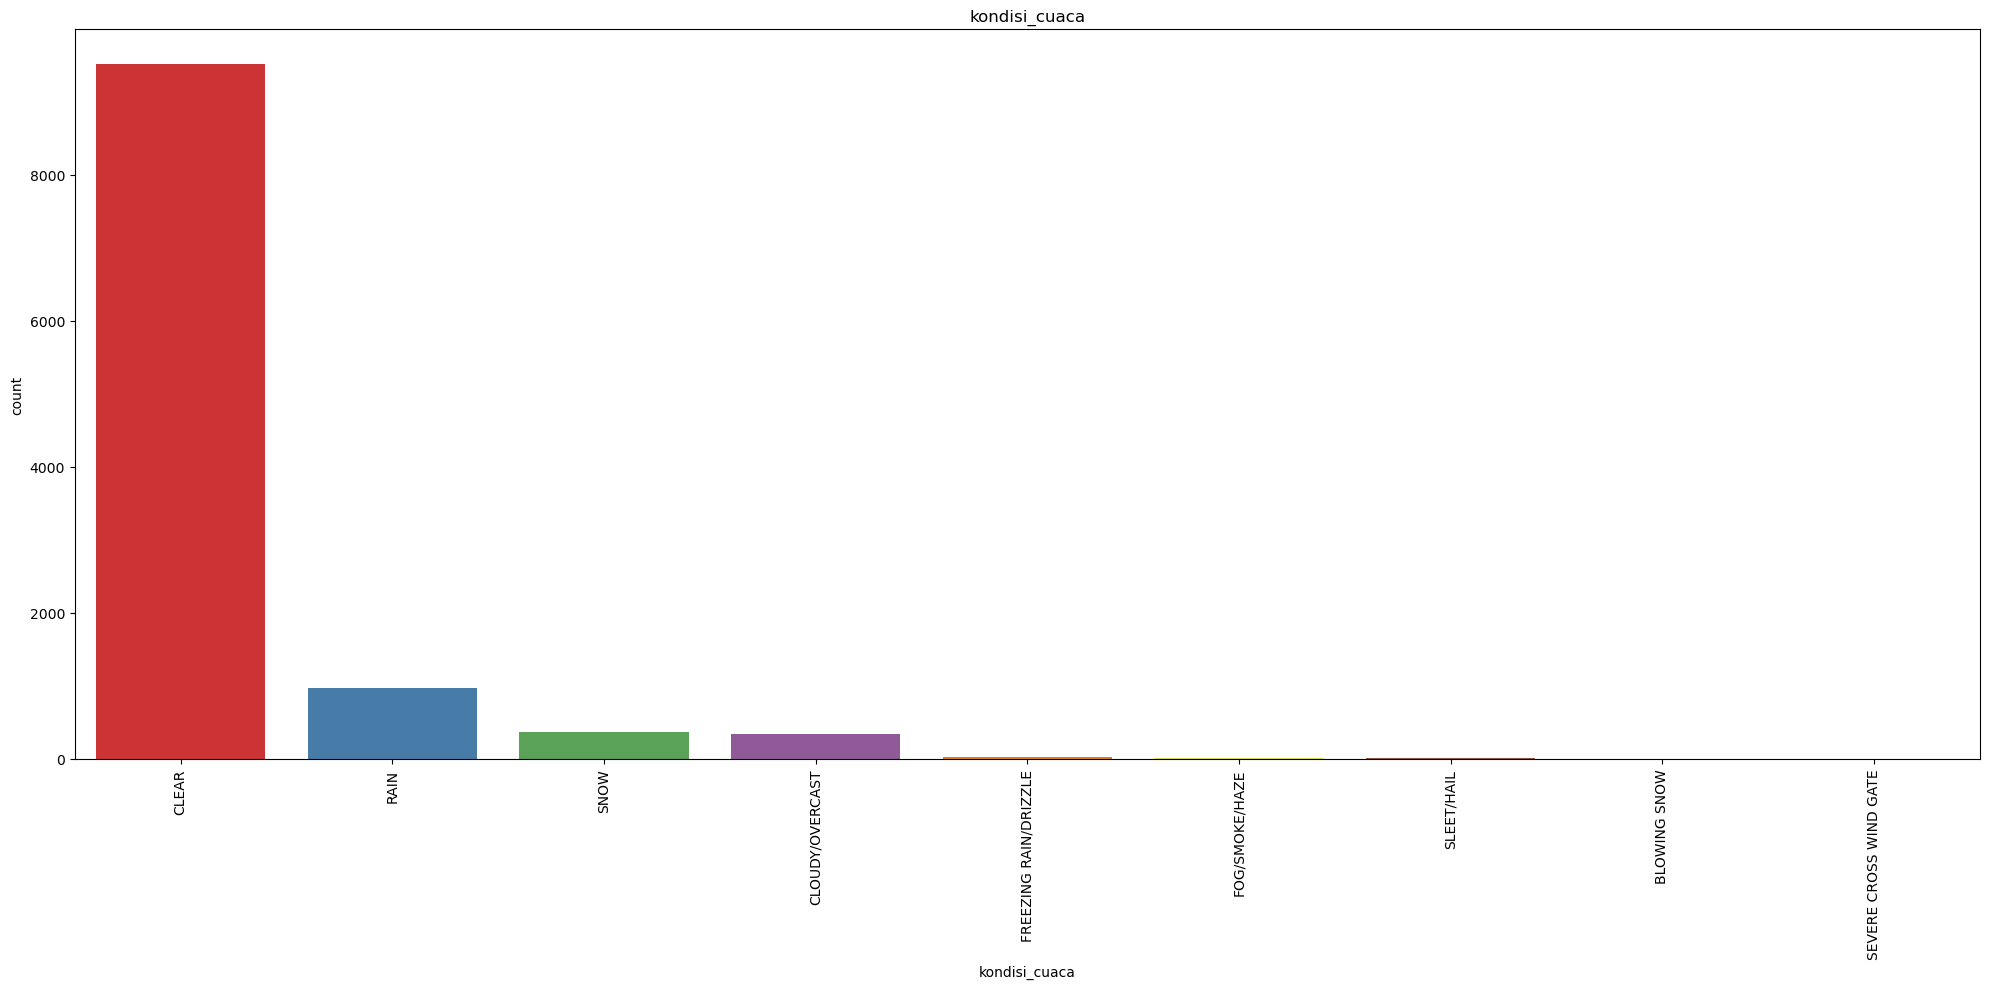

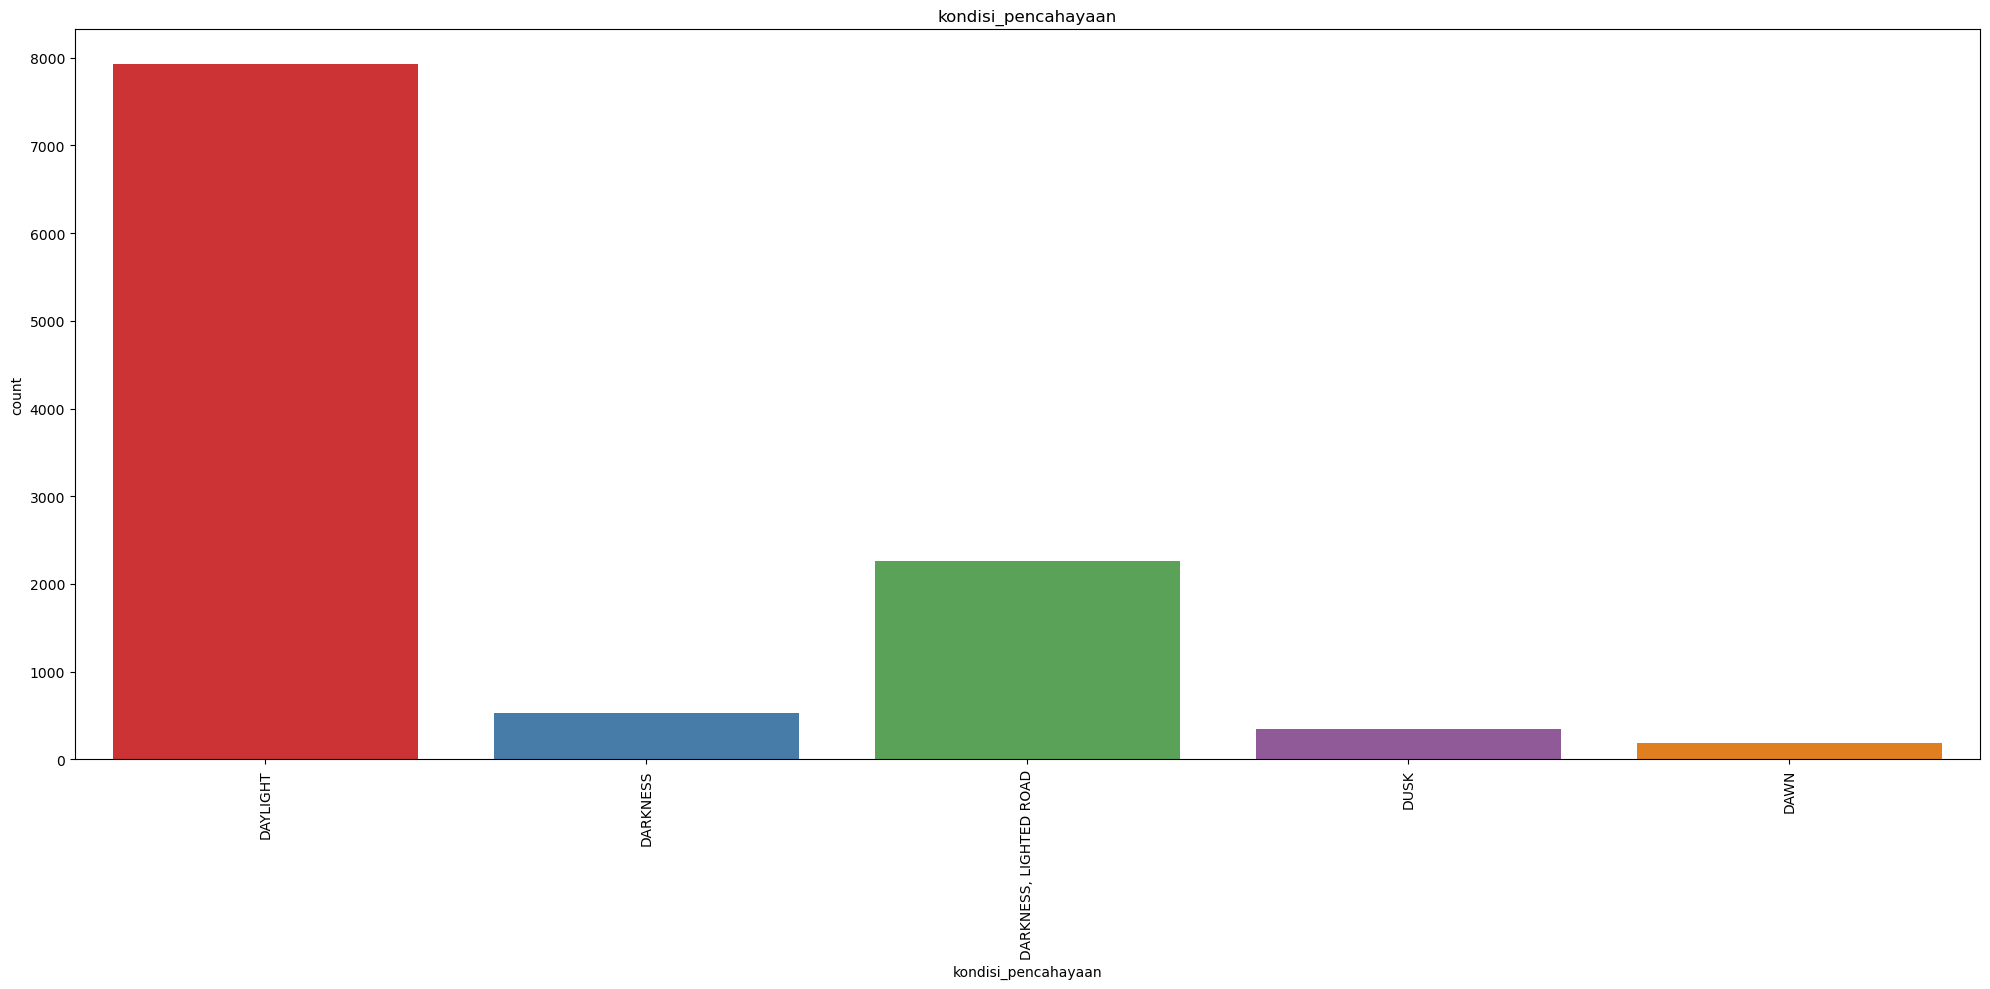

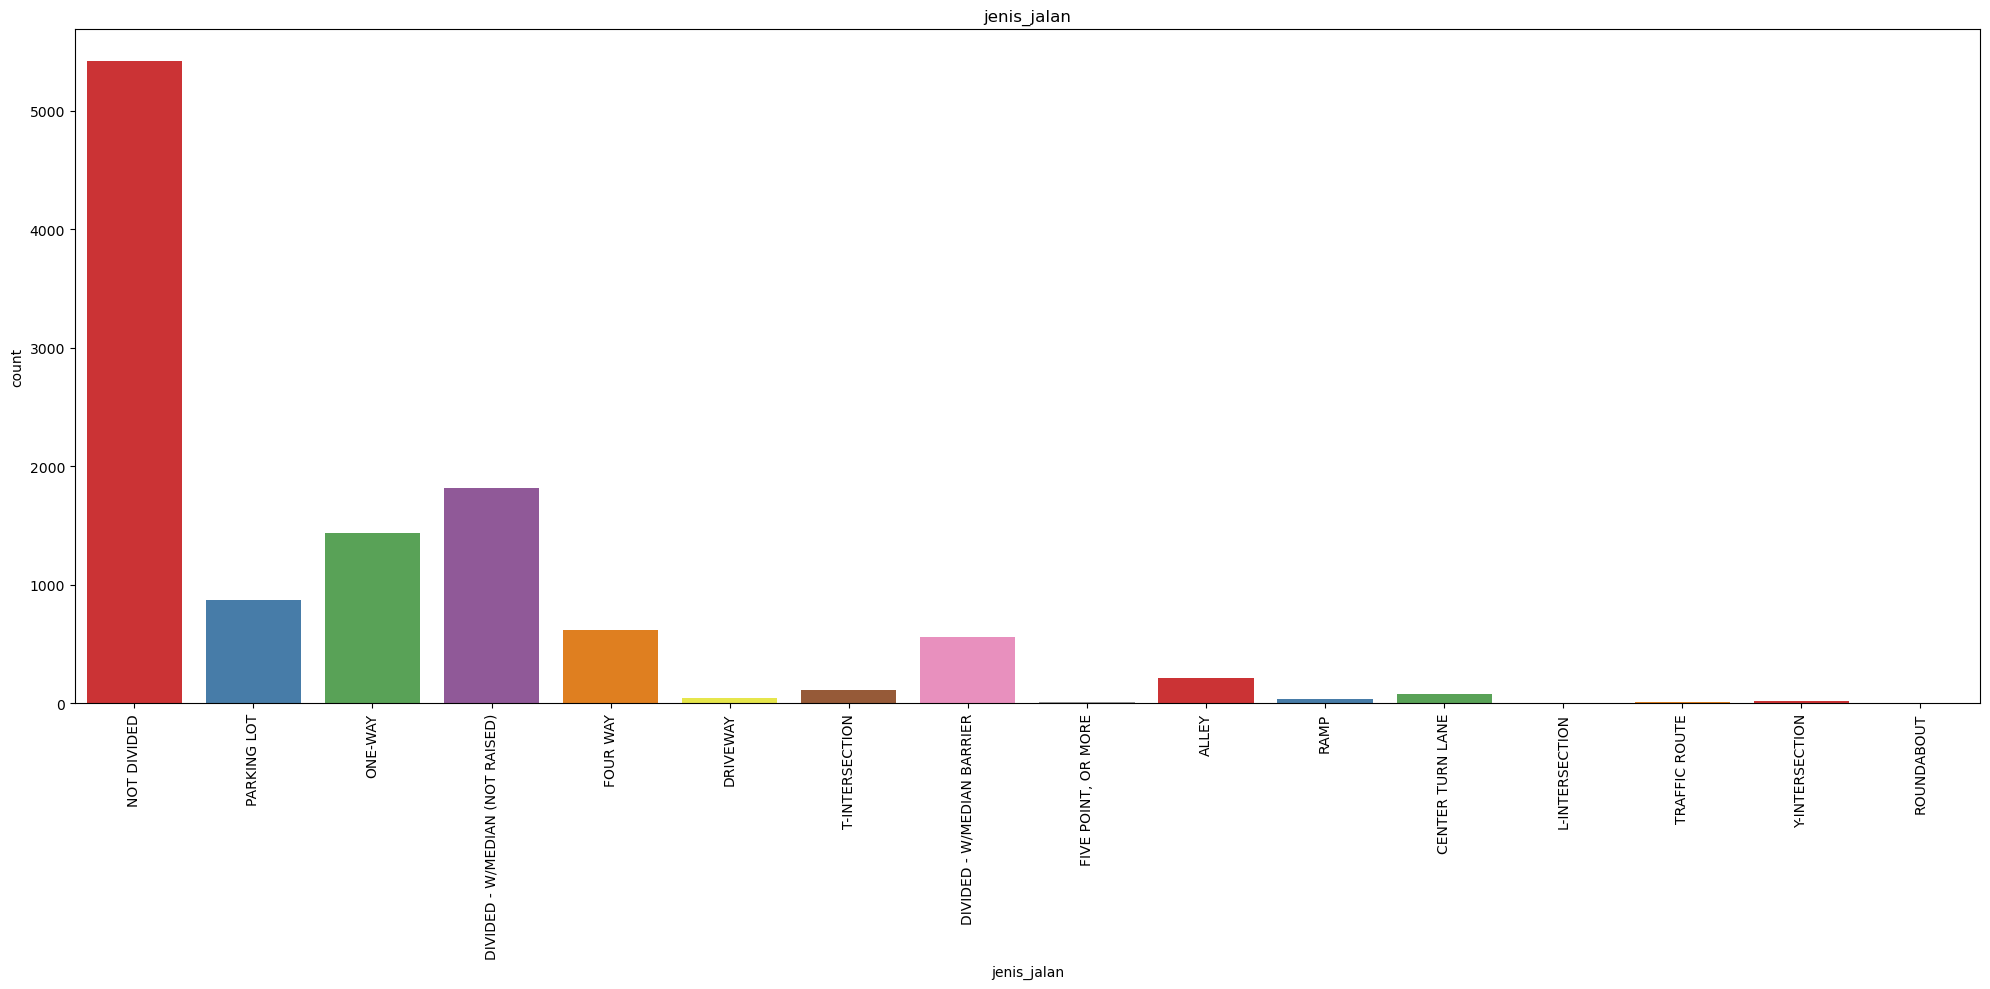

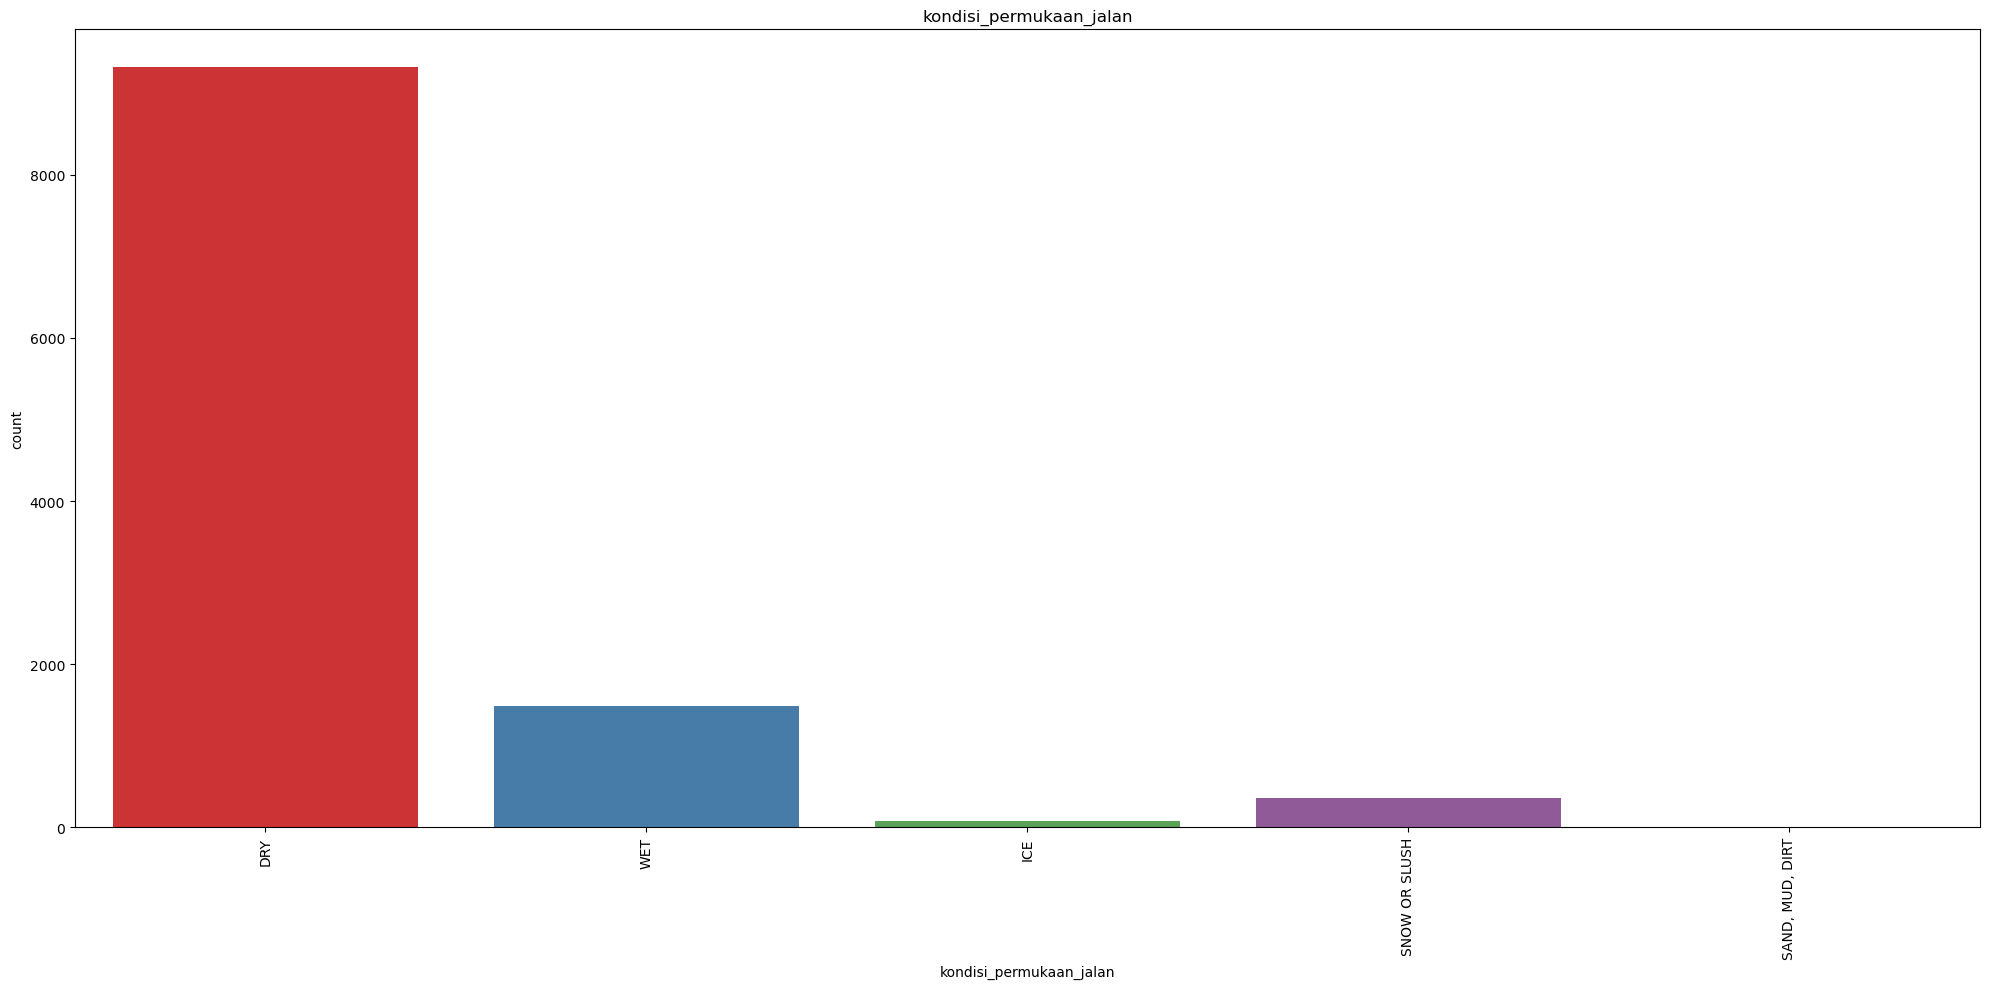

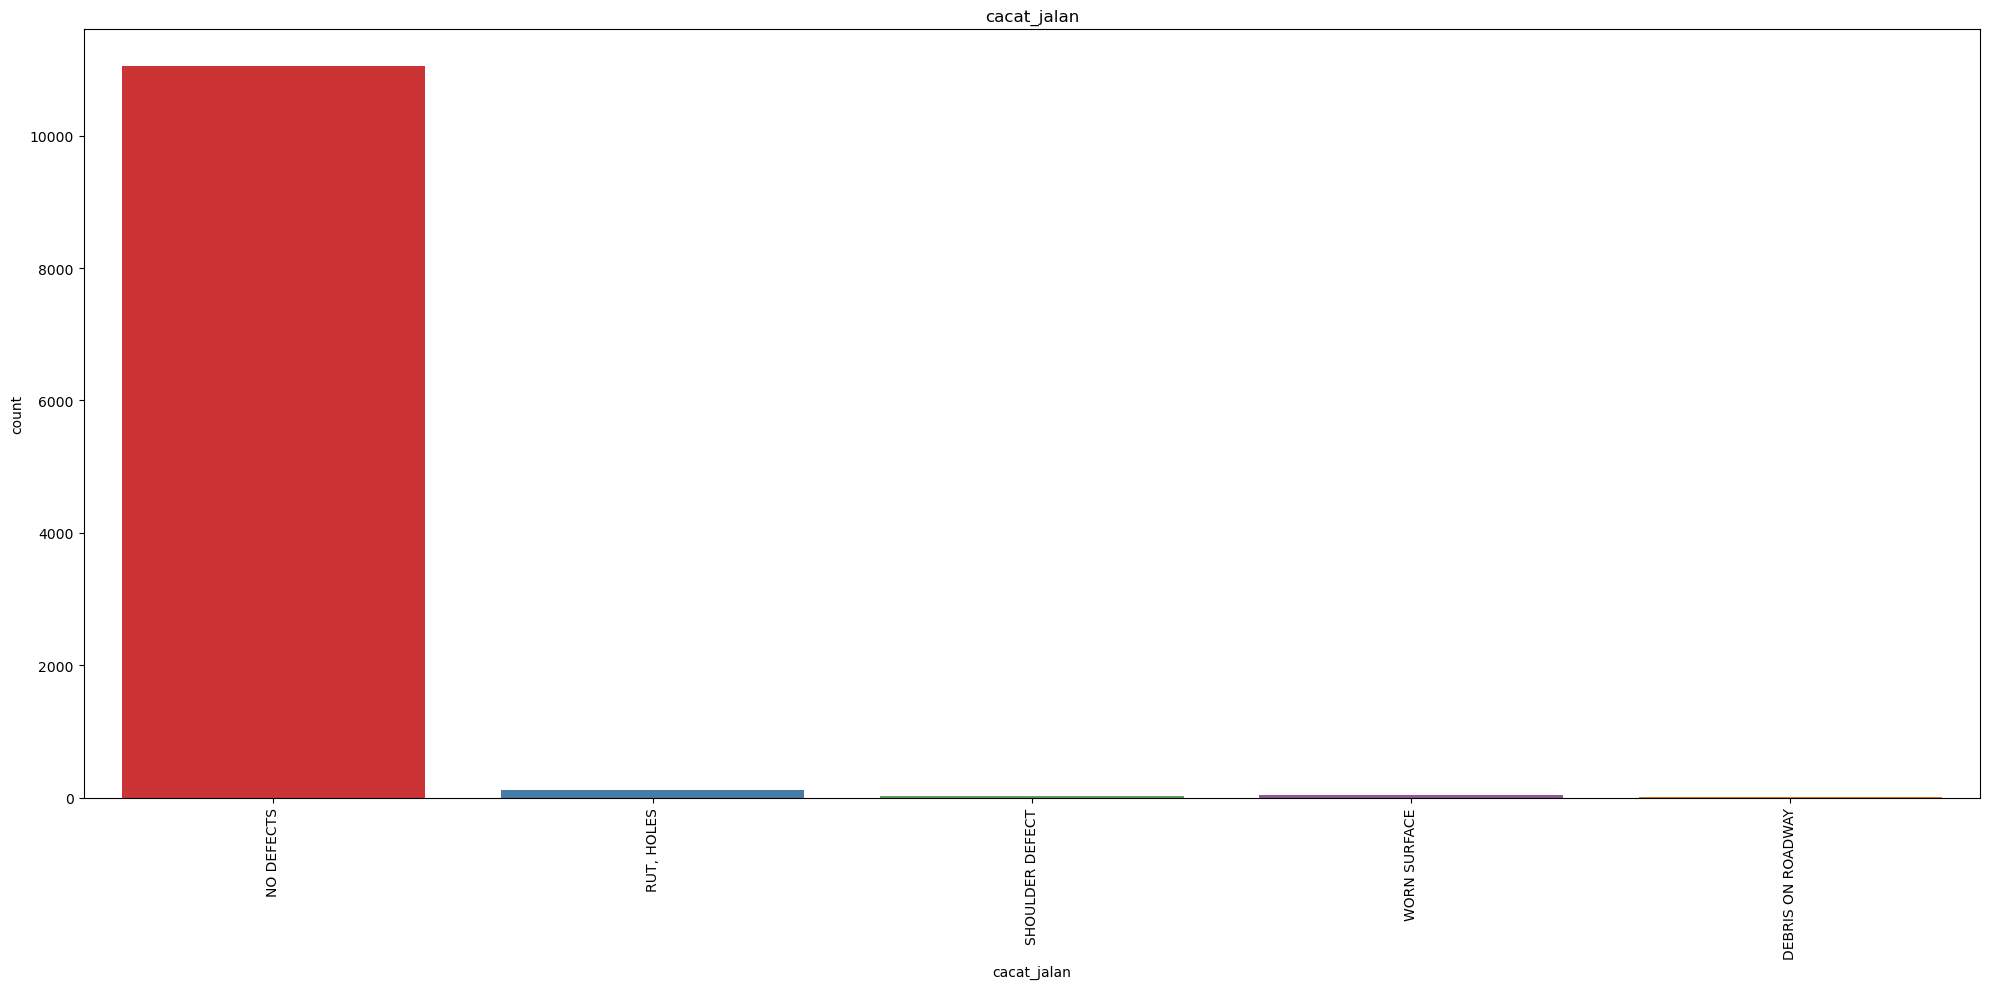

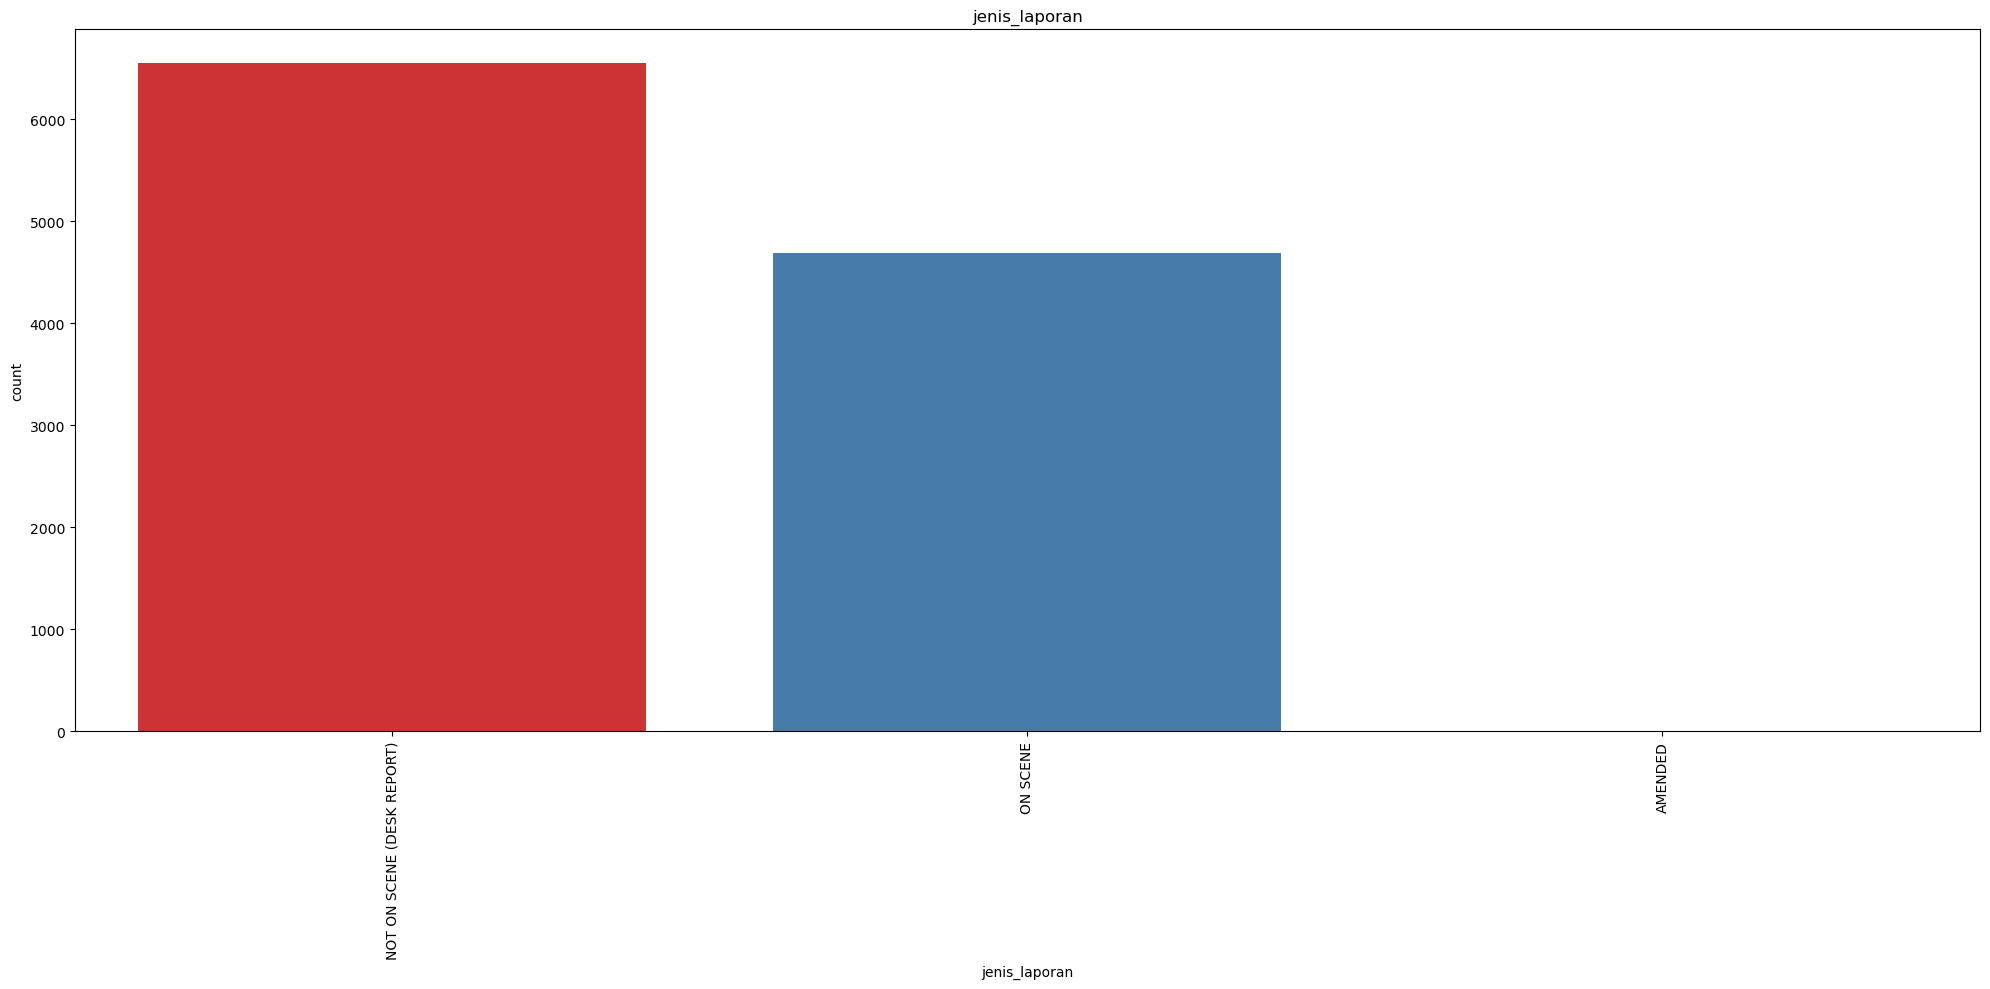

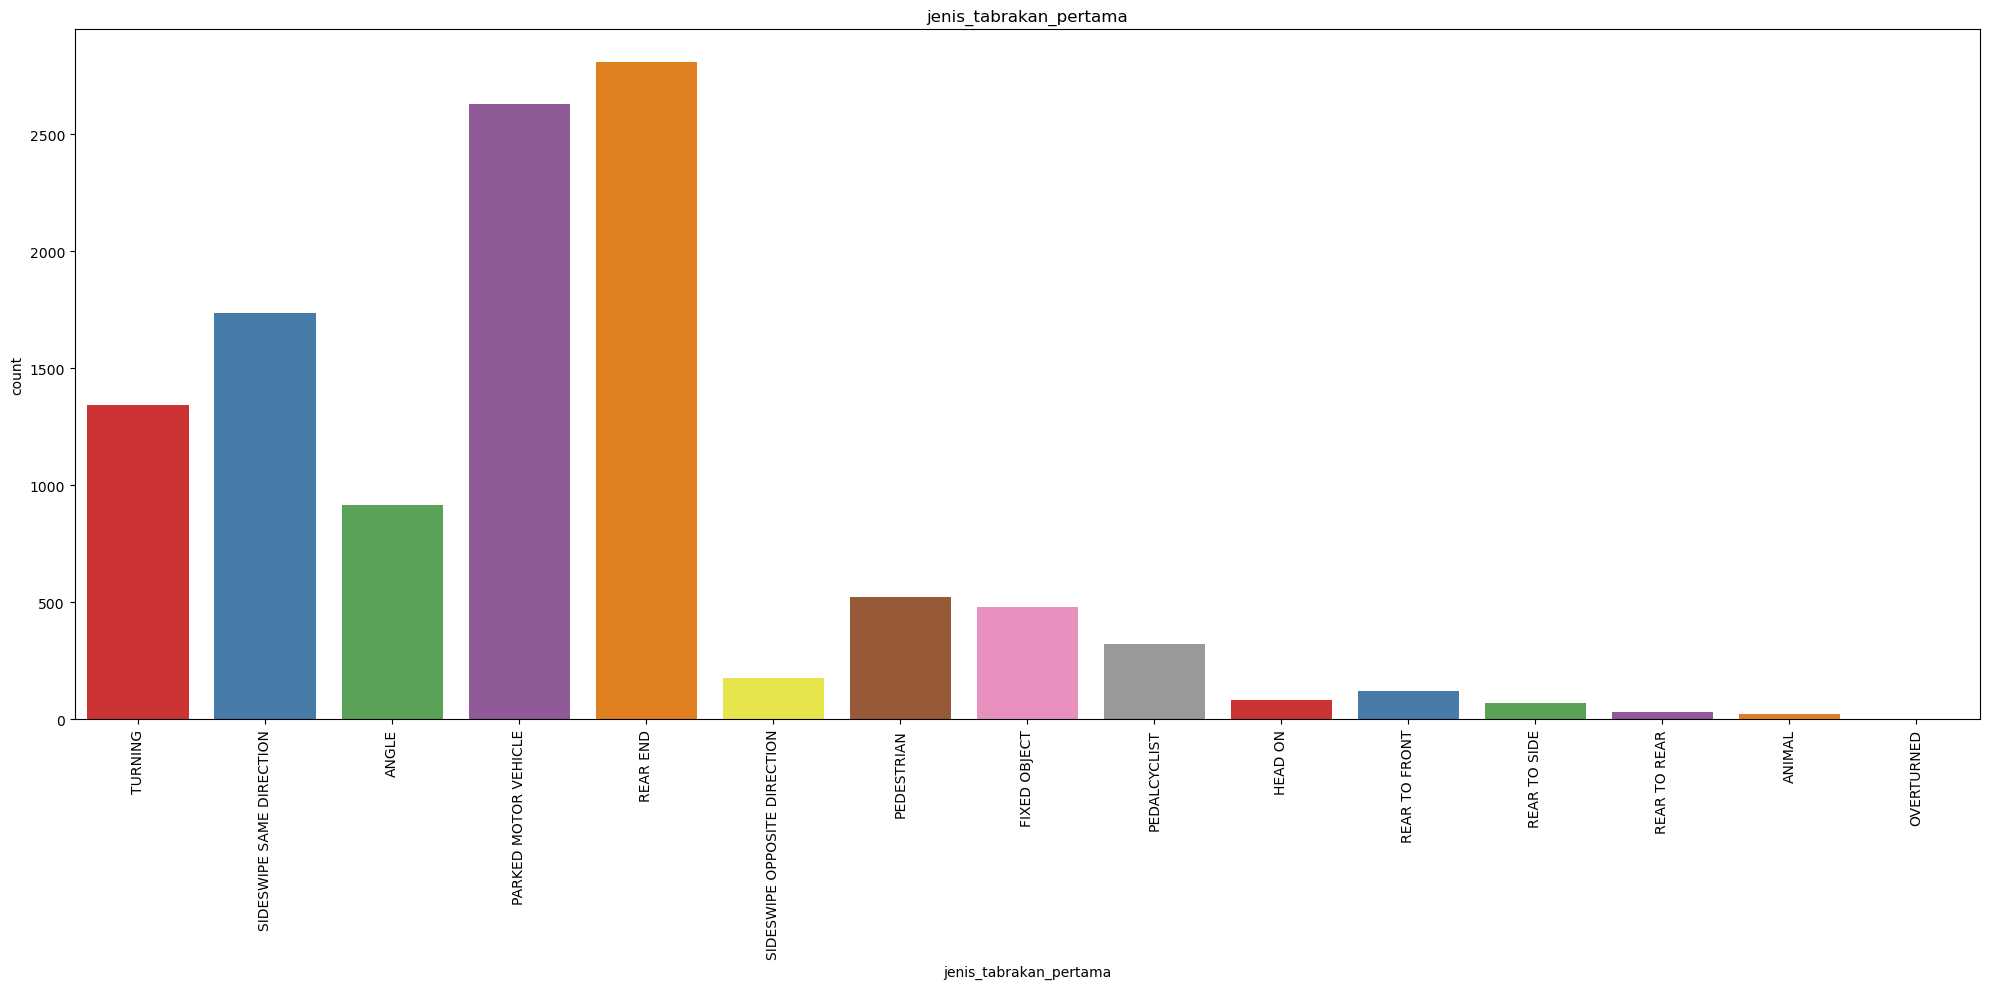

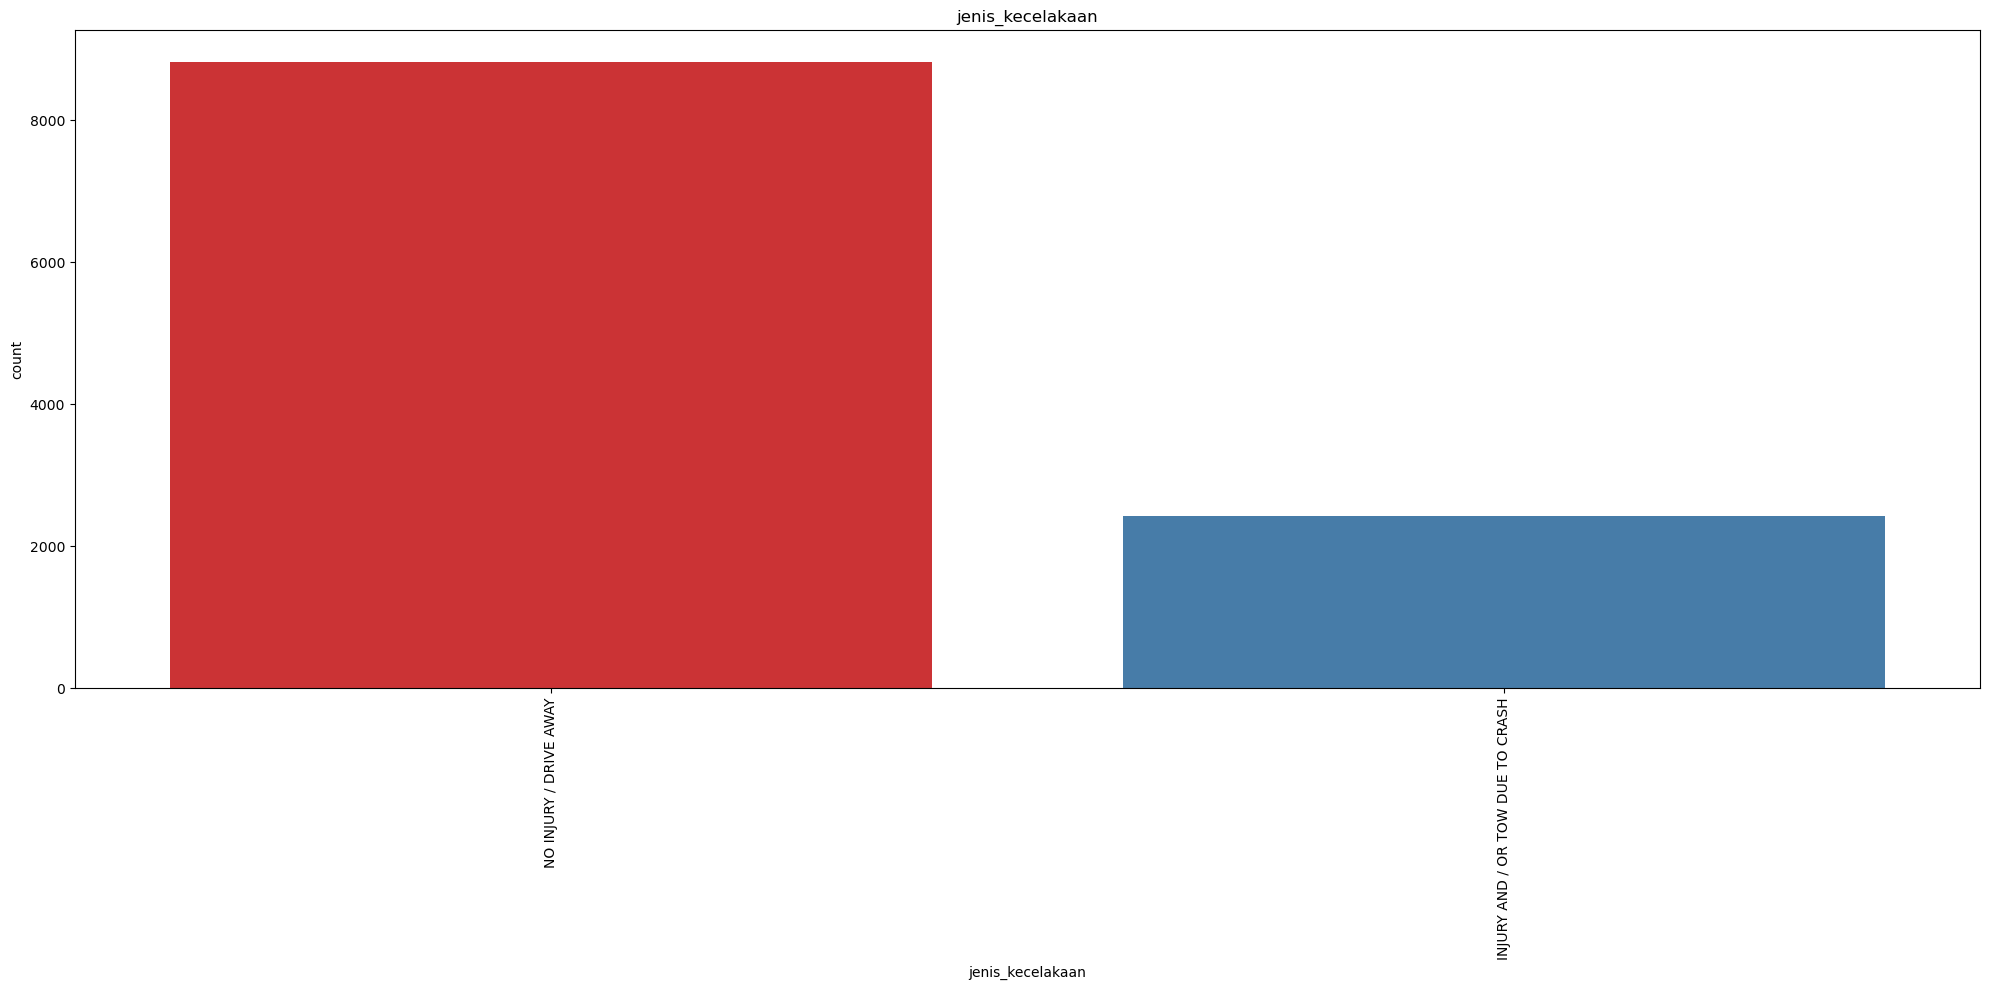

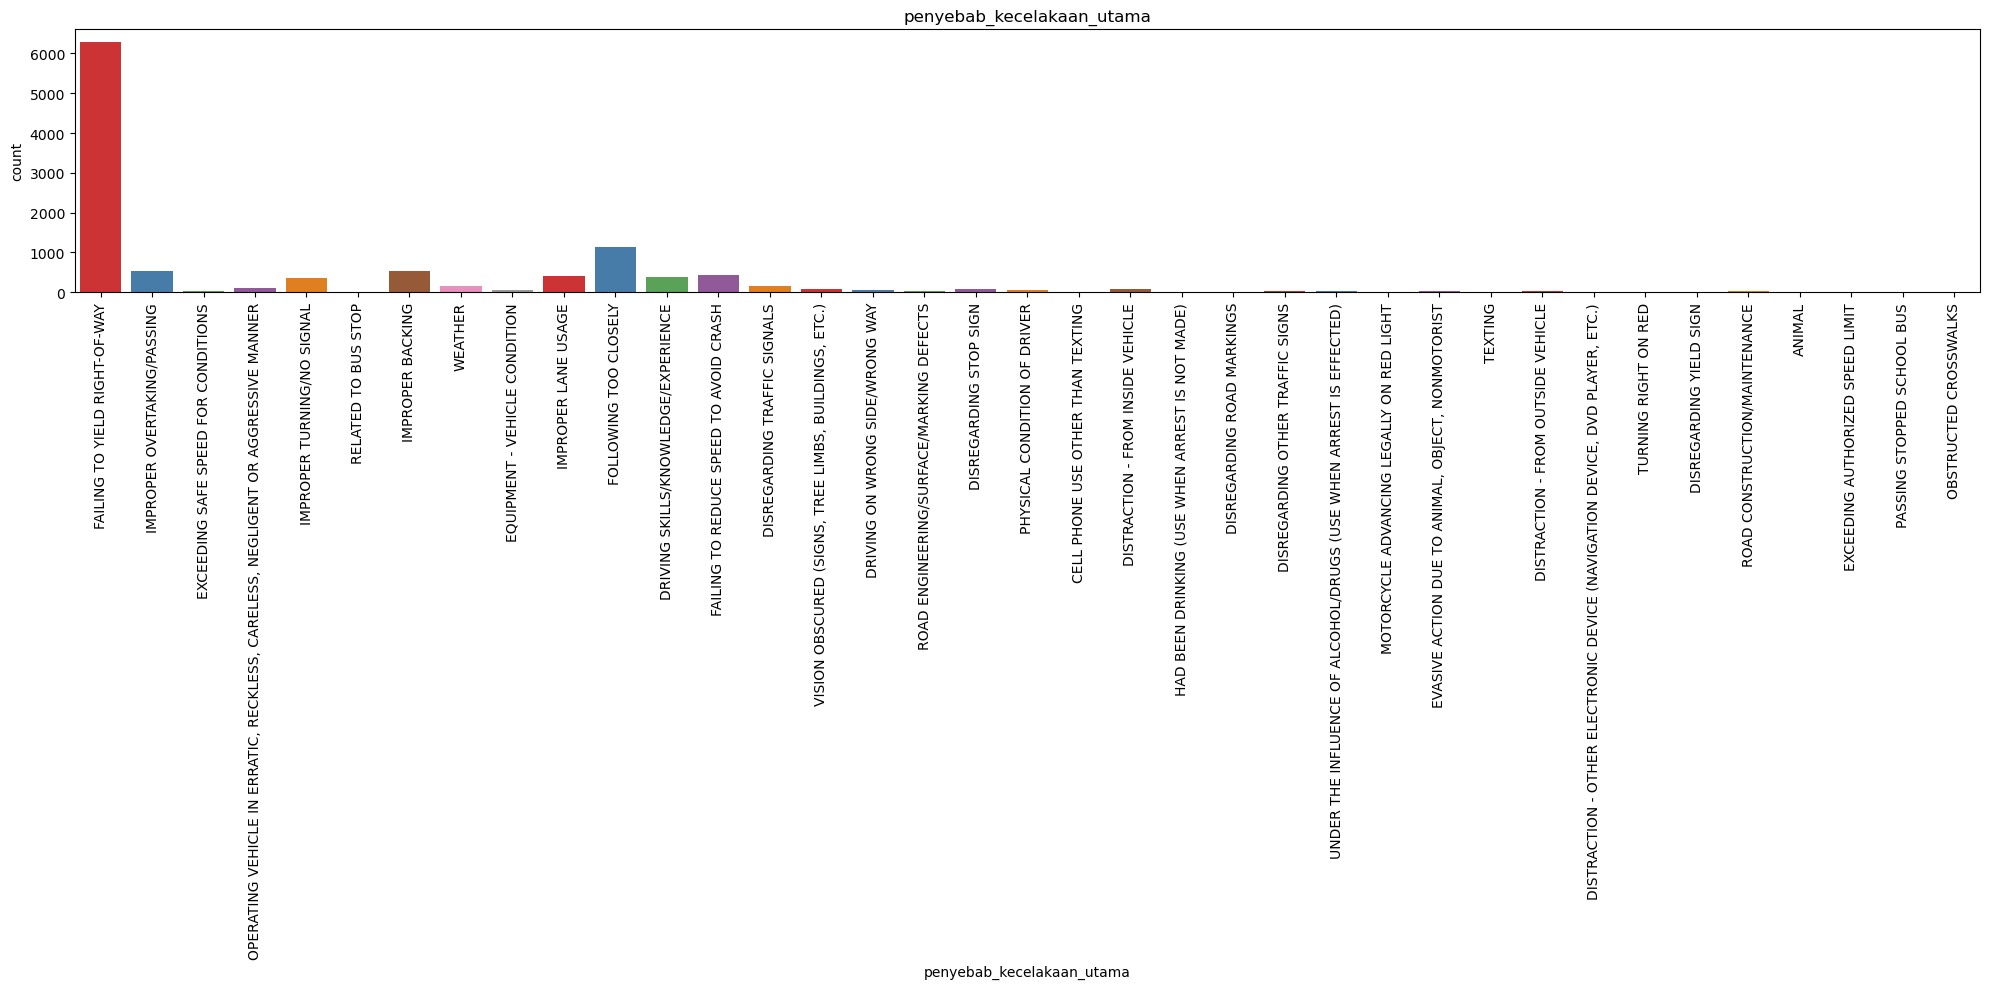

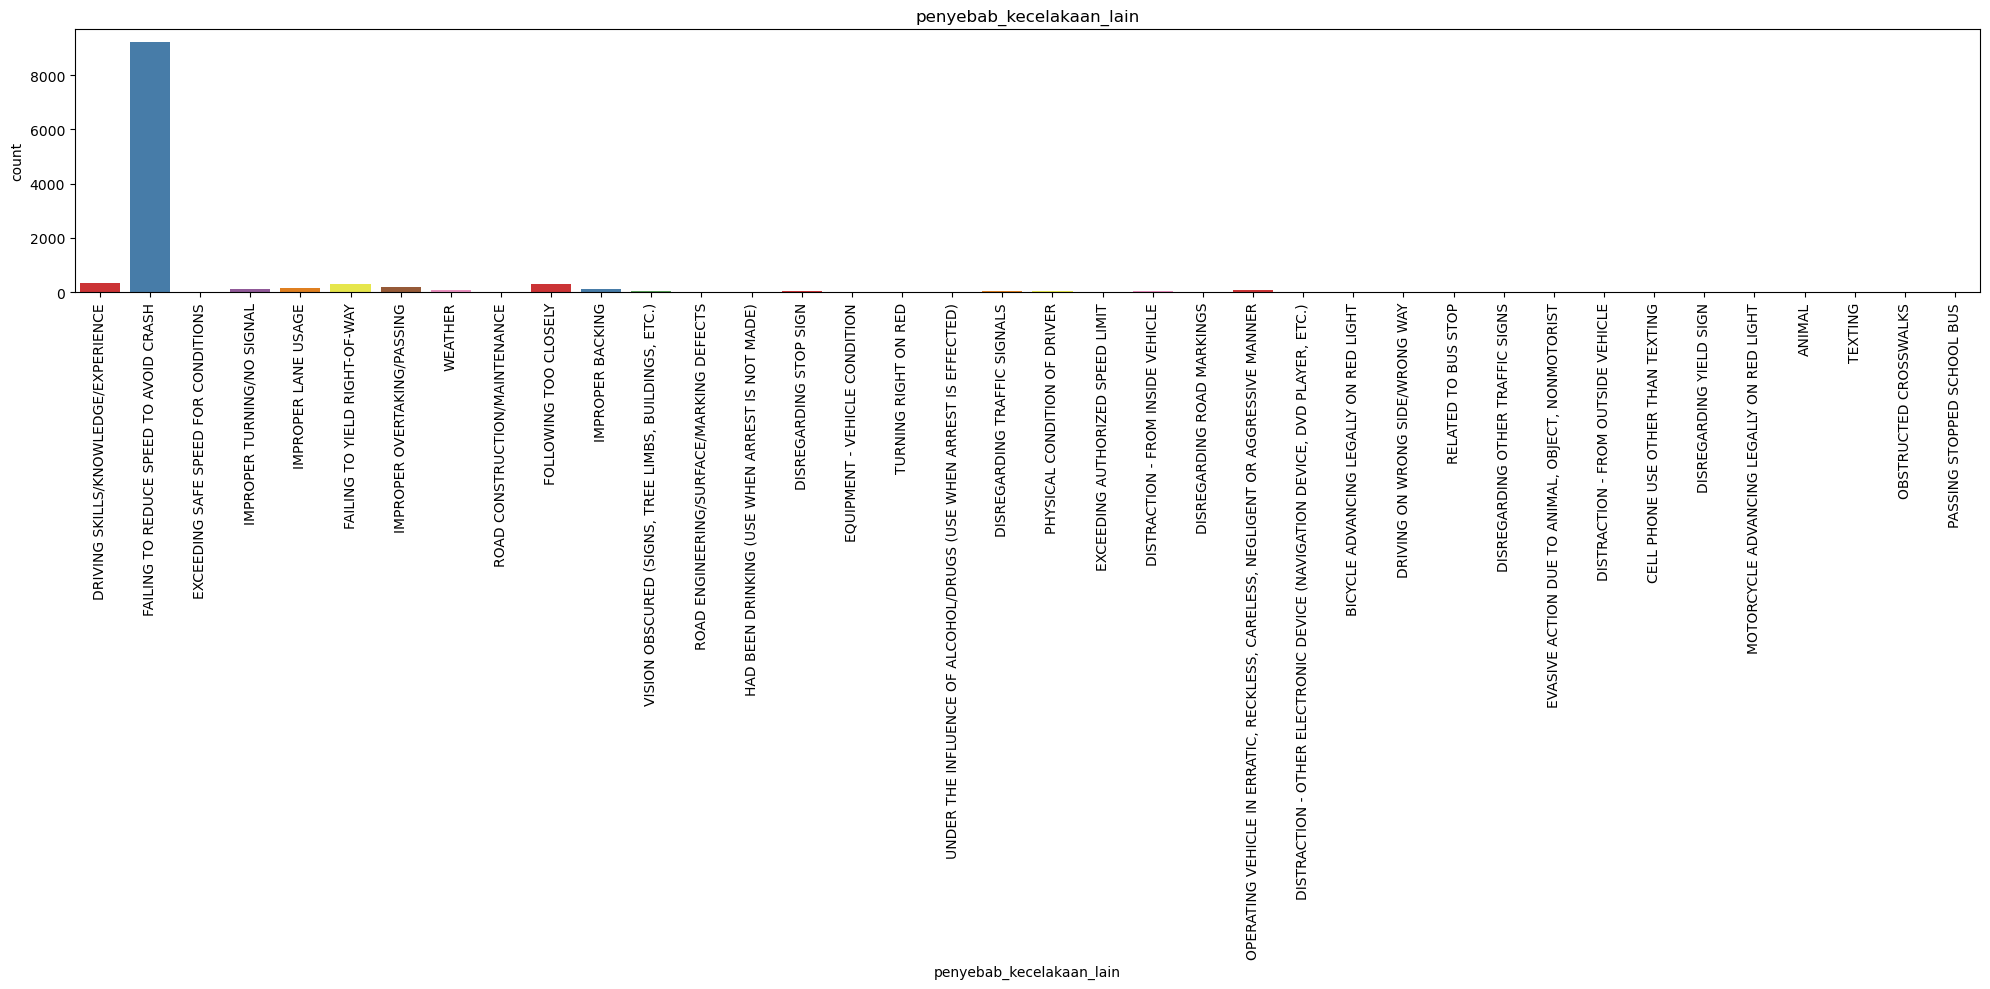

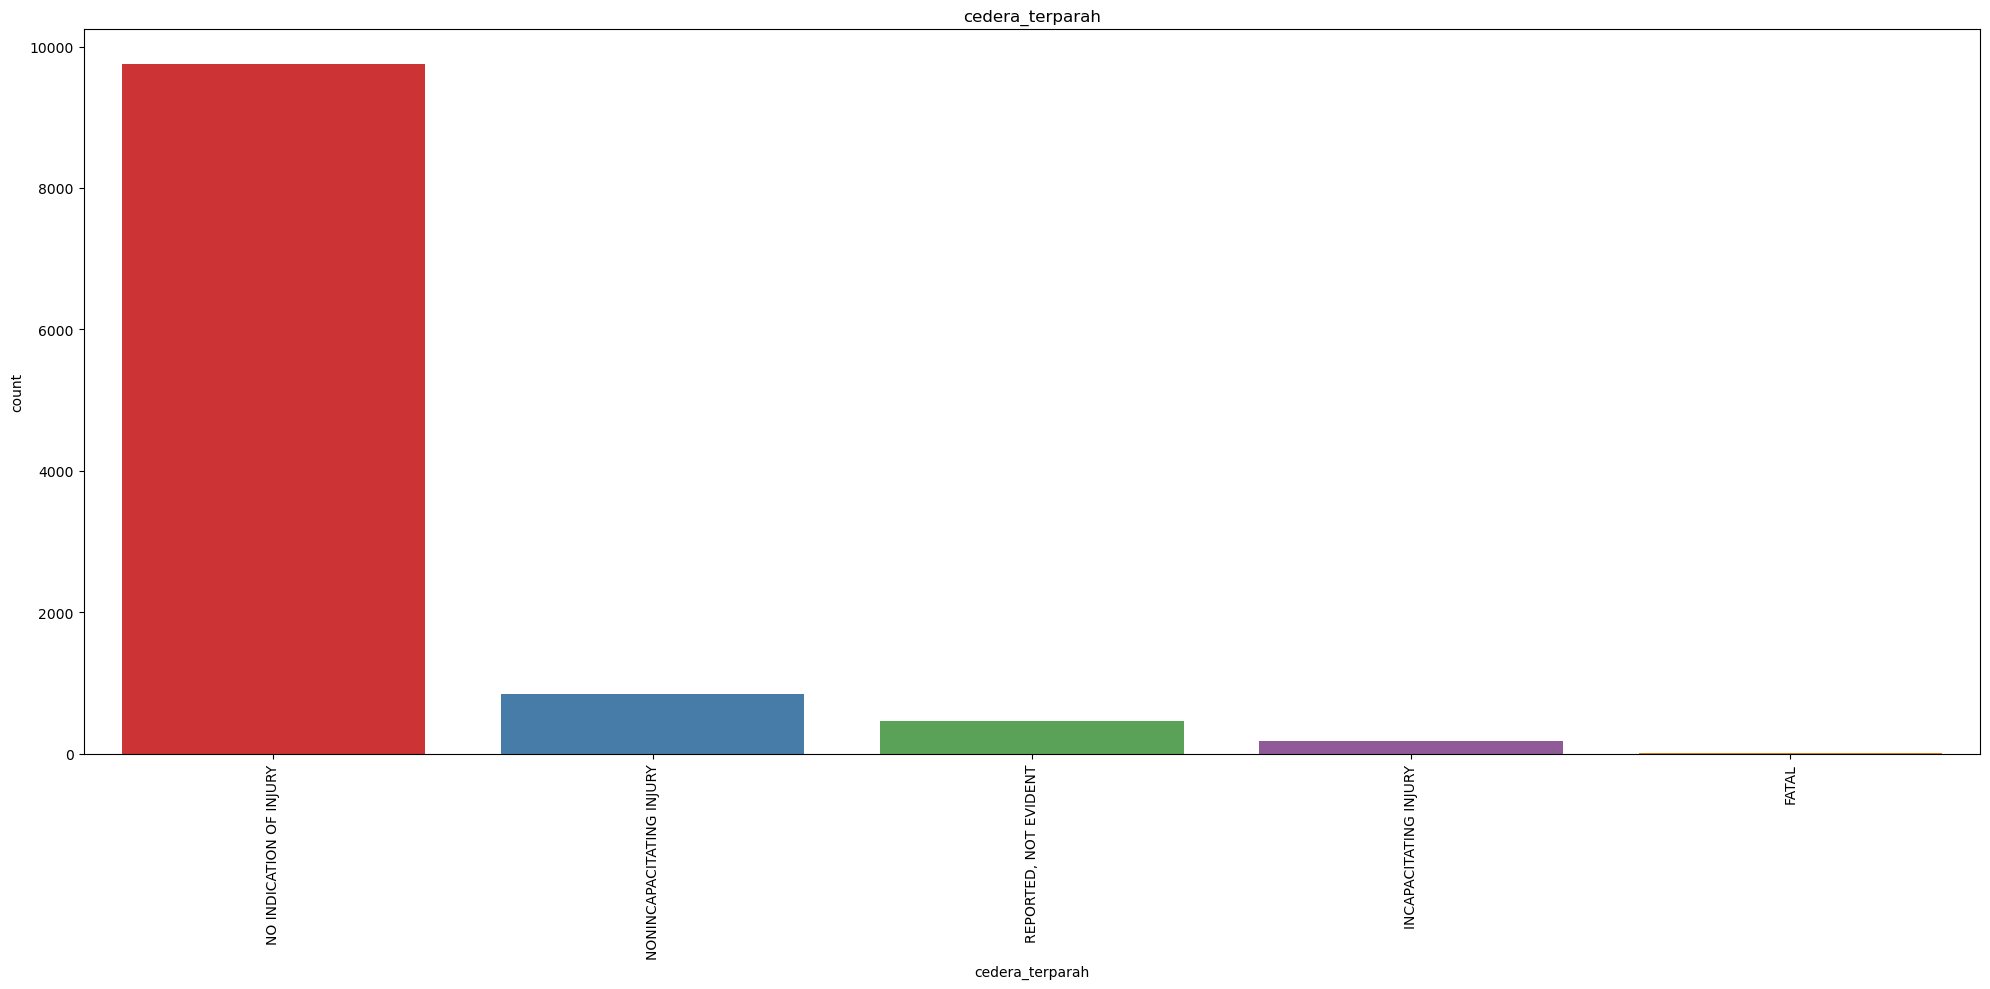

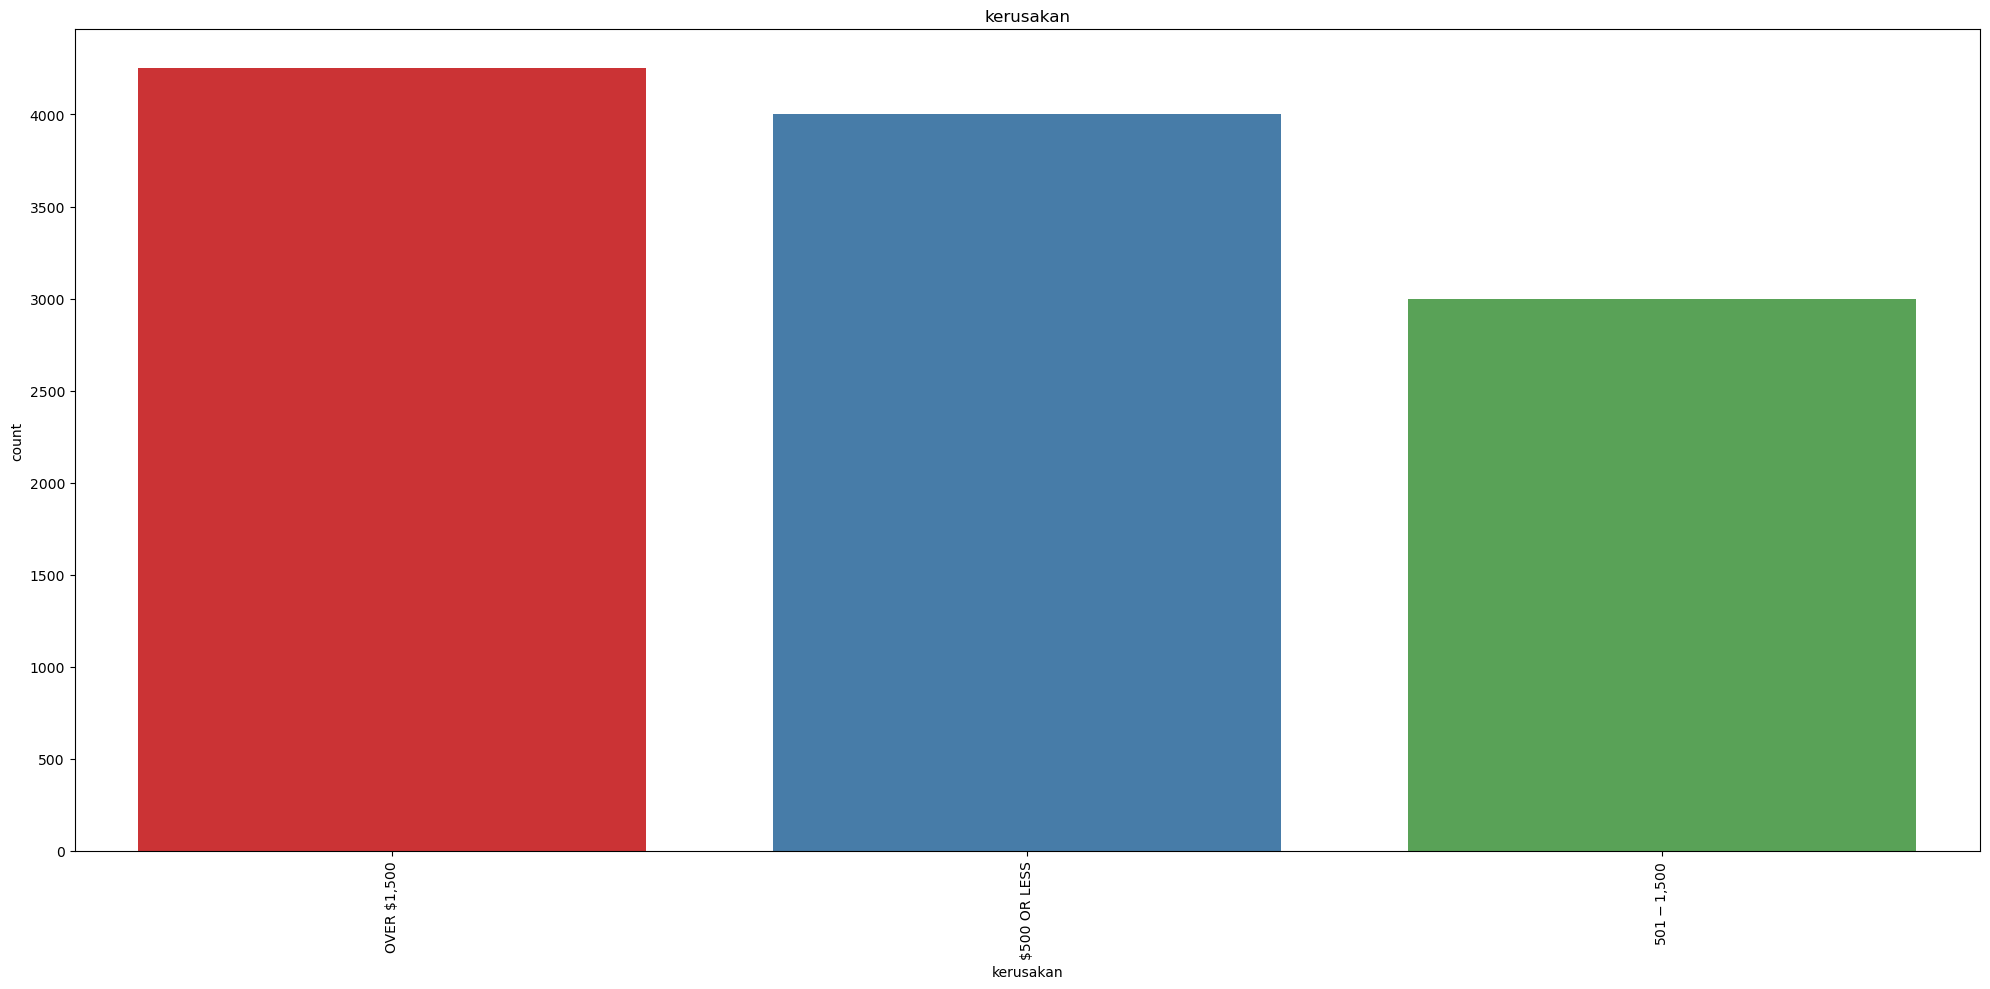

In [230]:
color_palette = sns.color_palette("Set1", len(cat_cols))
for i, column in enumerate(cat_cols, 1):
    if(column != 'tanggal_kecelakaan'):
        plt.figure(figsize=(20, 10))
        sns.countplot(data=df, x=column, palette=color_palette)
        plt.xticks(rotation=90)
        plt.title(column)
        plt.tight_layout()
        plt.show()

In [168]:
df.head()

,tanggal_kecelakaan,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,jenis_tabrakan_pertama,jenis_kecelakaan,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,tidak_ada_indikasi_cedera,kerusakan
0,0.287836,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),TURNING,NO INJURY / DRIVE AWAY,2,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,2.0,"OVER $1,500"
1,-0.298799,30,FUNCTIONING PROPERLY,CLEAR,DARKNESS,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,IMPROPER OVERTAKING/PASSING,FAILING TO REDUCE SPEED TO AVOID CRASH,NO INDICATION OF INJURY,2.0,$500 OR LESS
2,0.074217,30,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),ANGLE,NO INJURY / DRIVE AWAY,2,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,2.0,"$501 - $1,500"
3,1.642095,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,2,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO REDUCE SPEED TO AVOID CRASH,NO INDICATION OF INJURY,2.0,$500 OR LESS
4,1.334086,20,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ONE-WAY,DRY,NO DEFECTS,ON SCENE,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,2,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO REDUCE SPEED TO AVOID CRASH,NO INDICATION OF INJURY,1.0,"OVER $1,500"


## Modelling

In [220]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna

In [221]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Salin DataFrame
train = df.copy()

# Pisahkan fitur dan target
X = train.drop(['kerusakan'], axis=1)
y = train['kerusakan']

# Inisialisasi LabelEncoder
le_y = LabelEncoder()

# Terapkan label encoding pada y
y_encoded = le_y.fit_transform(y)

# Tentukan random state dan kfold
random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Sekarang X dan y_encoded siap digunakan untuk pelatihan model

In [222]:
label_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [223]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tanggal_kecelakaan         11250 non-null  float64
 1   batas_kecepatan_terpasang  11250 non-null  int64  
 2   kondisi_perangkat          11250 non-null  int32  
 3   kondisi_cuaca              11250 non-null  int32  
 4   kondisi_pencahayaan        11250 non-null  int32  
 5   jenis_jalan                11250 non-null  int32  
 6   kondisi_permukaan_jalan    11250 non-null  int32  
 7   cacat_jalan                11250 non-null  int32  
 8   jenis_laporan              11250 non-null  int32  
 9   jenis_tabrakan_pertama     11250 non-null  int32  
 10  jenis_kecelakaan           11250 non-null  int32  
 11  jumlah_unit                11250 non-null  int64  
 12  penyebab_kecelakaan_utama  11250 non-null  int32  
 13  penyebab_kecelakaan_lain   11250 non-null  int

In [224]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Inisialisasi PowerTransformer dengan metode Yeo-Johnson (default)
power_transformer = PowerTransformer(method='yeo-johnson')

# Terapkan transformasi pada data X
X_power_transformed = power_transformer.fit_transform(X)

# Mengembalikan hasil dalam bentuk DataFrame agar kolom tetap sama seperti X
X_scaled_df = pd.DataFrame(X_power_transformed, columns=X.columns)

# Menampilkan 5 baris pertama dari DataFrame hasil transformasi
X_scaled_df.head()


,tanggal_kecelakaan,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,cacat_jalan,jenis_laporan,jenis_tabrakan_pertama,jenis_kecelakaan,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,tidak_ada_indikasi_cedera
0,0.225425,0.237689,0.012686,-0.398056,0.474079,0.340976,-0.455287,-0.081023,-0.833929,1.422672,0.52434,0.027827,-0.138554,-1.729244,-0.219235,0.231125
1,-0.247932,0.237689,0.012686,-0.398056,-1.845268,0.340976,-0.455287,-0.081023,-0.833929,1.203633,0.52434,0.027827,0.932459,-0.094016,-0.219235,0.231125
2,0.052925,0.237689,0.012686,-0.398056,-1.544684,1.264314,-0.455287,-0.081023,-0.833929,-1.966314,0.52434,0.027827,-0.572779,-0.405467,-0.219235,0.231125
3,1.321401,1.302848,0.012686,-0.398056,0.474079,0.340976,-0.455287,-0.081023,-0.833929,1.203633,0.52434,0.027827,-0.138554,-0.094016,-0.219235,0.231125
4,1.071850,-1.453429,0.012686,-0.398056,0.474079,0.786944,-0.455287,-0.081023,1.170975,-0.639134,0.52434,0.027827,-0.138554,-0.094016,-0.219235,-1.037205


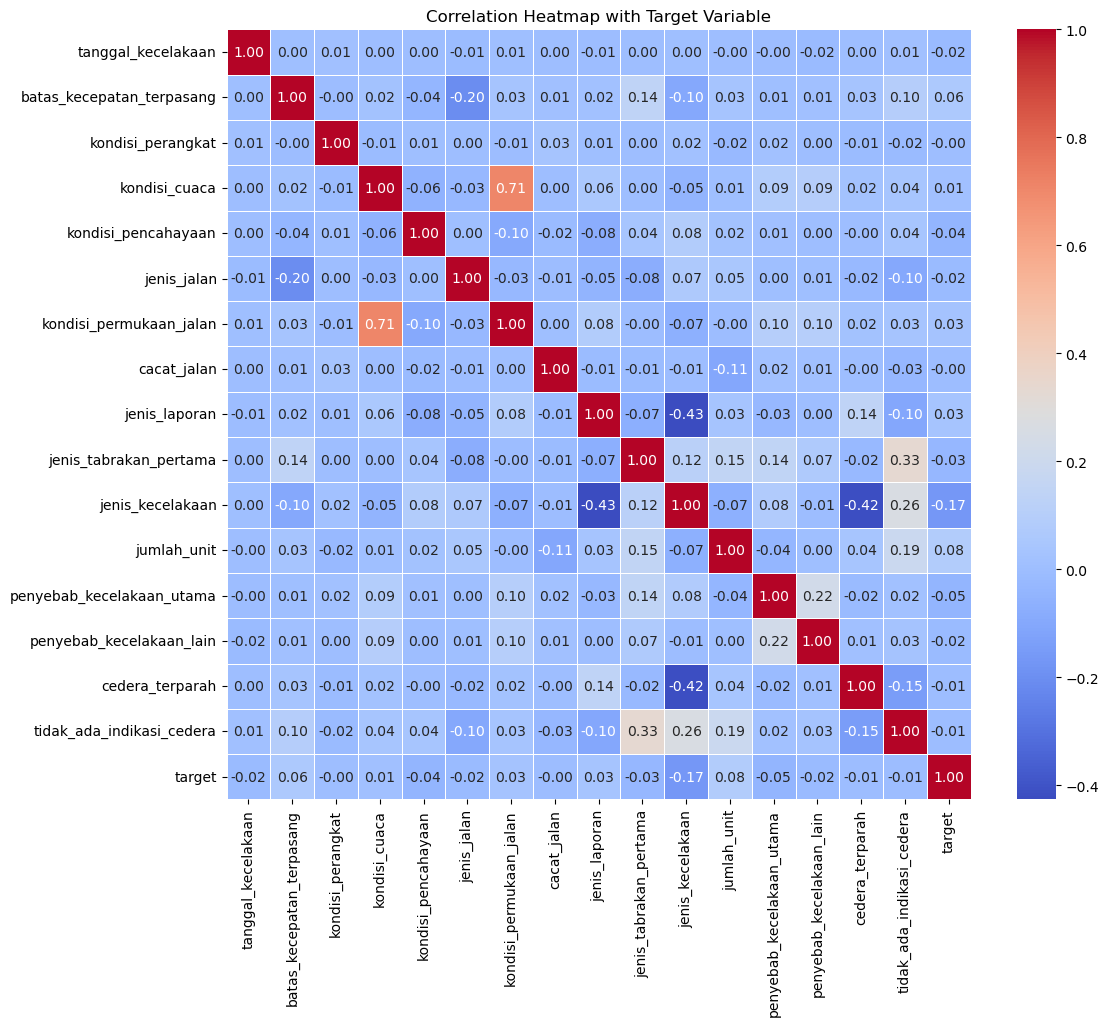

In [225]:
# Misalkan y_train adalah Series dengan nama kolom 'target'
y_train_df = pd.Series(y_encoded, name='target')

# Menggabungkan X_scaled_df dengan y_train
combined_df = pd.concat([X_scaled_df, y_train_df], axis=1)

# Menghitung matriks korelasi
corr_matrix = combined_df.corr()

# Mengatur ukuran figure
plt.figure(figsize=(12, 10))

# Membuat heatmap menggunakan seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Heatmap with Target Variable")

# Menampilkan heatmap
plt.show()

In [226]:
X_scaled_df = X_scaled_df.drop(labels=['kondisi_perangkat'],axis=1)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_encoded, test_size=0.2, 
                                                    stratify=y_encoded, random_state=random_state)

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Inisialisasi model
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error'))
classifiers.append(CatBoostClassifier(random_state=random_state, verbose=0))  # Menambahkan CatBoostClassifier

# Evaluasi model menggunakan F1 score
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring="f1_weighted", cv=kfold, n_jobs=4))

# Menghitung rata-rata dan deviasi standar dari hasil cross-validation
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Membuat DataFrame untuk hasil
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": ["KNN", "GaussianNB", "Decision Tree", "Random Forest", "XGBoost", "CatBoost"]
})

# Mengurutkan berdasarkan nilai rata-rata F1 score
cv_res = cv_res.sort_values(by='CrossValMeans', ascending=False)

# Menampilkan hasil
cv_res


,CrossValMeans,CrossValerrors,Algorithm
4,0.471403,0.005934,XGBoost
5,0.469339,0.013898,CatBoost
3,0.460695,0.007966,Random Forest
2,0.427390,0.011932,Decision Tree
0,0.426944,0.003150,KNN
1,0.368630,0.025952,GaussianNB


In [231]:
for i, classifier in enumerate(classifiers):
    print(f"F1 Scores for {cv_res['Algorithm'][i]}: {cv_results[i]}")

F1 Scores for KNN: [0.43048621 0.42624706 0.43029595 0.42209031 0.42560295]
F1 Scores for GaussianNB: [0.40471672 0.34011413 0.38456697 0.33787889 0.37587336]
F1 Scores for Decision Tree: [0.41153857 0.41609274 0.43331946 0.43196941 0.44402918]
F1 Scores for Random Forest: [0.45813262 0.46133247 0.47019596 0.44712672 0.4666873 ]
F1 Scores for XGBoost: [0.46714617 0.46722076 0.48302699 0.4701896  0.46943167]
F1 Scores for CatBoost: [0.44891148 0.47234071 0.4841474  0.4832341  0.45806345]


In [232]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    clf = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=random_state,
        eval_metric='mlogloss',  # Menggunakan metrik evaluasi yang sesuai
        use_label_encoder=False
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score


In [233]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-10-03 22:58:38,984] A new study created in memory with name: no-name-f581f760-8070-4e34-a8cd-619578862ca3
[I 2024-10-03 22:58:51,136] Trial 0 finished with value: 0.45777777777777773 and parameters: {'n_estimators': 143, 'max_depth': 20, 'learning_rate': 0.15732883705565812, 'min_child_weight': 3, 'subsample': 0.5527644752956349, 'colsample_bytree': 0.5617763298312854}. Best is trial 0 with value: 0.45777777777777773.
[I 2024-10-03 22:58:59,007] Trial 1 finished with value: 0.4742222222222222 and parameters: {'n_estimators': 221, 'max_depth': 9, 'learning_rate': 0.09965500837551196, 'min_child_weight': 8, 'subsample': 0.5772721485431154, 'colsample_bytree': 0.828310242448624}. Best is trial 1 with value: 0.4742222222222222.
[I 2024-10-03 22:59:08,404] Trial 2 finished with value: 0.4684444444444445 and parameters: {'n_estimators': 207, 'max_depth': 15, 'learning_rate': 0.11338406960201279, 'min_child_weight': 10, 'subsample': 0.7461621609933051, 'colsample_bytree': 0.5734021636

In [234]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 289, 'max_depth': 17, 'learning_rate': 0.01416731522632875, 'min_child_weight': 7, 'subsample': 0.8295732636233557, 'colsample_bytree': 0.5214038982488773}


In [235]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model XGBoost dengan parameter terbaik
clf = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],  # Menambahkan learning_rate
    min_child_weight=best_params['min_child_weight'],  # Menambahkan min_child_weight
    subsample=best_params['subsample'],  # Menambahkan subsample
    colsample_bytree=best_params['colsample_bytree'],  # Menambahkan colsample_bytree
    random_state=random_state,
    use_label_encoder=False  # Menonaktifkan label encoder
)

# Fit model dengan data pelatihan
clf.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi
score = accuracy_score(y_test, y_pred)
print('Val Accuracy:', score)


Val Accuracy: 0.4831111111111111


In [250]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Membaca data test
test = pd.read_csv('Praktikum_2_ML(test).csv')

# Menghapus kolom crash_record_id
test_df = test.drop('crash_record_id', axis=1)
test_df.drop(labels=['longitude','latitude'],axis=1,inplace=True)
test_df.drop(labels=[
                'jumlah_cedera',
                'cedera_fatal',
                'cedera_serius',
                'cedera_tidak_serius',
                'cedera_dilaporkan_tidak_nyata'],axis=1,inplace=True)
# Mengkonversi kolom tanggal
test_df['tanggal_kecelakaan'] = pd.to_datetime(test_df['tanggal_kecelakaan'])
test_df['tanggal_kecelakaan'] = test_df['tanggal_kecelakaan'].values.astype(int)
test_df['tanggal_kecelakaan'] = test_df['tanggal_kecelakaan'].div(10**9)

# Mengganti nilai-nilai yang sesuai dengan NaNPhrase menjadi NaN
for col, phrases in NaNPhrase.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].replace(phrases, pd.NA)
        
        # Mengisi NaN dengan mode dari kolom tersebut
        mode = test_df[col].mode()[0] if not test_df[col].mode().empty else None
        if mode is not None:
            test_df[col] = test_df[col].fillna(mode)

# Transformasi kolom kategori di test_df
for col, le in label_encoders.items():
    if col in test_df.columns:  # Pastikan kolom ada dalam test_df
        # Cek jika ada nilai NaN dan kita ingin mengisi NaN dengan mode
        if test_df[col].isnull().any():
            mode = test_df[col].mode()[0] if not test_df[col].mode().empty else None
            if mode is not None:
                test_df[col].fillna(mode, inplace=True)

        # Gunakan try-except untuk menangani label yang tidak terlihat
        try:
            test_df[col] = le.transform(test_df[col].astype(str))
        except ValueError as e:
            print(f"Warning: {e}.")
            # Menyimpan kategori yang tidak ada ke NaN
            unseen_labels = set(test_df[col].astype(str)) - set(le.classes_)
            print(f"Unseen labels in column {col}: {unseen_labels}")
            test_df[col] = np.where(test_df[col].astype(str).isin(le.classes_), 
                                     le.transform(test_df[col].astype(str)), 
                                     np.nan)
    else:
        print(f"Warning: Column {col} not found in test_df.")

# Normalisasi data menggunakan PowerTransformer
# Pastikan PowerTransformer sudah di-fit pada data pelatihan sebelumnya
try:
    test_df_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
except ValueError as e:
    print(f"Error during scaling: {e}. Check the input data.")


In [255]:
test_df_scaled.drop(labels='kondisi_perangkat',axis=1,inplace=True)

In [256]:
pred = clf.predict(test_df_scaled)
pred

array([2, 0, 0, ..., 0, 0, 2], dtype=int64)

In [257]:
decoded_predictions = le_y.inverse_transform(pred)

# Menampilkan hasil prediksi yang sudah didecode
decoded_predictions

array(['OVER $1,500', '$500 OR LESS', '$500 OR LESS', ..., '$500 OR LESS',
       '$500 OR LESS', 'OVER $1,500'], dtype=object)

In [261]:
submissions = pd.DataFrame({'crash_record_id': test['crash_record_id'], 'kerusakan': decoded_predictions})
submissions.kerusakan.value_counts()


$500 OR LESS     2245
OVER $1,500      1359
$501 - $1,500     146
Name: kerusakan, dtype: int64

In [262]:
submissions.to_csv('submission_again_2.csv', index=False)